<a href="https://colab.research.google.com/github/davidmartimar/tfm-1-resumen-multimodal/blob/main/notebooks/tfm_1_resumen_multimodal_laboral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

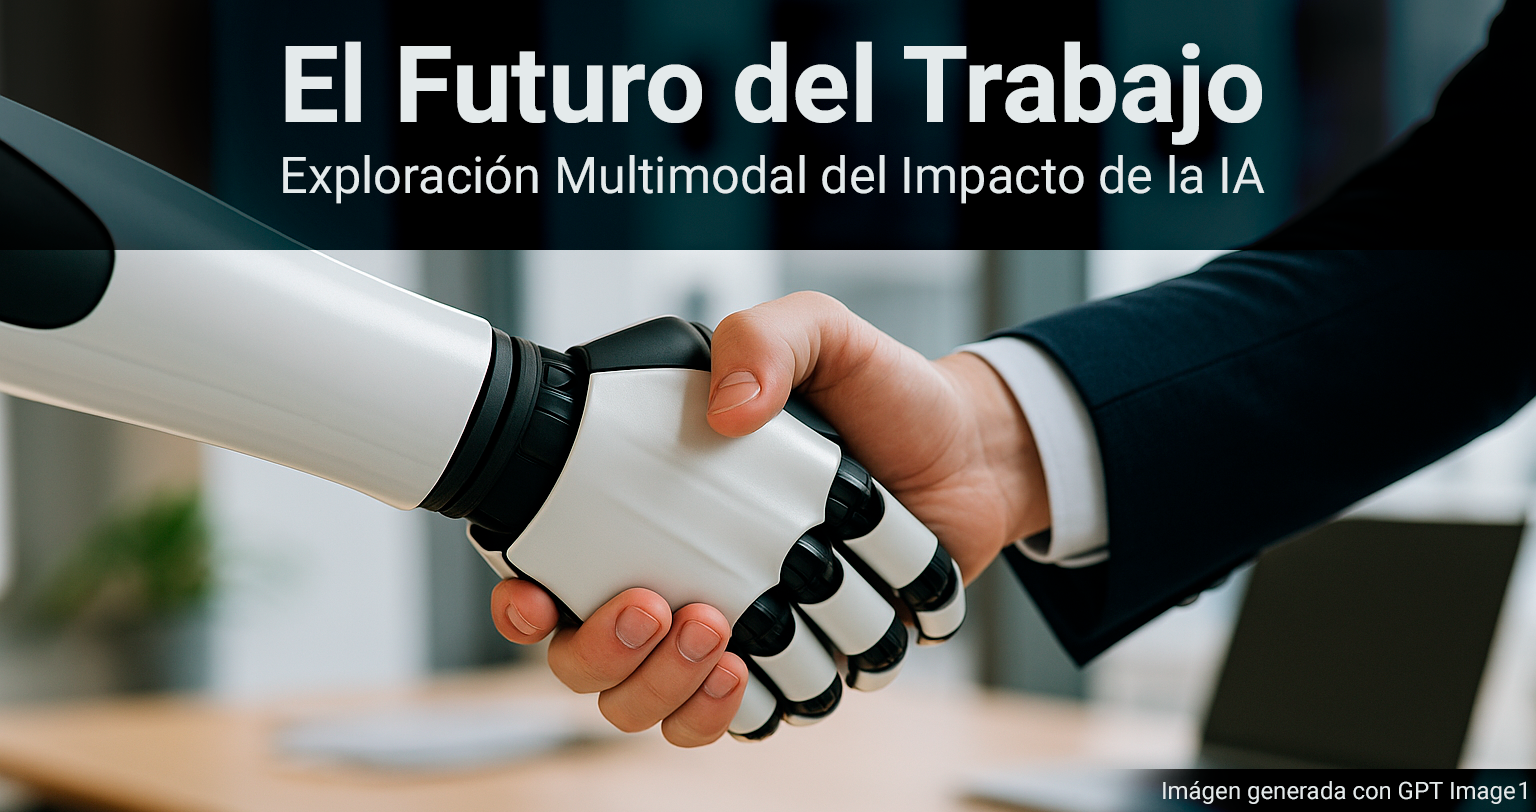

# 0. Introducción

La **inteligencia artificial (IA)** está transformando aceleradamente múltiples sectores económicos, alterando no solo los modelos de negocio sino también las dinámicas del empleo a nivel global. Desde el reemplazo de tareas repetitivas hasta la creación de nuevos perfiles profesionales, su impacto en el mercado laboral es objeto de debate, preocupación e investigación en todo el mundo.

Este proyecto tiene como objetivo **analizar de forma crítica y sintética el efecto que la IA está teniendo sobre el empleo**, con especial atención al contexto español e internacional. Para ello, se utilizarán fuentes de información multimodal, incluyendo textos escritos (artículos periodísticos, informes, papers científicos, blogs especializados) y contenido hablado (vídeos y podcasts transcritos automáticamente).

El análisis combina técnicas de **procesamiento de lenguaje natural (NLP)** como el análisis de sentimiento, la detección de temas (topic modeling) y la generación automática de resúmenes mediante modelos de lenguaje (LLMs). Además, se desarrollarán visualizaciones que faciliten la comprensión de los patrones y opiniones predominantes extraídos de los datos.

A través de este enfoque, se busca no solo **resumir el estado actual del debate sobre la IA y el empleo**, sino también **ofrecer insights que puedan ser útiles para empresas, trabajadores y responsables de políticas públicas**. Este trabajo aspira a demostrar la capacidad de integrar herramientas técnicas con análisis crítico y comunicación visual clara en un contexto realista y de actualidad.

# 1. Objetivos del proyecto

A continuación, vamos a analizar, a través de un enfoque multimodal, cómo está afectando la inteligencia artificial al mercado laboral. Para ello, se definen los siguientes objetivos concretos:

- **Resumir de forma sintética y objetiva** la percepción pública y las evidencias disponibles en torno al impacto laboral de la inteligencia artificial, integrando contenido textual y audiovisual.

- **Detectar sentimientos predominantes, temas frecuentes y comparativas** relevantes entre sectores, perfiles profesionales o regiones geográficas, utilizando técnicas de procesamiento de lenguaje natural (NLP) y modelos de lenguaje (LLMs).

- **Ilustrar los hallazgos mediante visualizaciones interpretables**, que permitan comunicar de forma clara y eficaz los principales insights extraídos del análisis.

- **Extraer información de dos tipos de fuentes complementarias**:
  - **Texto escrito**: se analizarán artículos e informes provenientes de medios y entidades relevantes como *Xataka* (Cultura Tech), *MIT Technology Review* (Académico) o *Harvard Business Review* (Empresarial) y *Wired* (Ética), obtenidos mediante técnicas de scraping (`newspaper3k`).

  - **Contenido audiovisual transcrito**: se transcribirán cinco vídeos videos recientes de YouTube relacionados con el tema del proyecto. La extracción se realizará mediante `yt_dlp` y el modelo de transcripción automática `Whisper`.

Este planteamiento permite abordar el análisis de forma ordenada, comenzando por la recopilación sistemática de las fuentes identificadas y culminando en la generación de conclusiones respaldadas por evidencia textual y visual.



**Posibles aplicaciones del proyecto:**

El enfoque desarrollado en este proyecto puede aplicarse a distintos contextos prácticos, entre ellos:

- Generación automática de boletines semanales sobre el impacto de la inteligencia artificial en el empleo, dirigidos a responsables de recursos humanos, medios tecnológicos o divulgadores.

- Creación de contenido para redes sociales, como resúmenes visuales o narrativas multimedia (carruseles, vídeos cortos o infografías) basadas en los hallazgos extraídos de fuentes fiables.

- Análisis comparativo sectorial o geográfico para detectar riesgos de automatización, oportunidades de reentrenamiento profesional o desigualdades emergentes.

**Esquema general del flujo de trabajo**


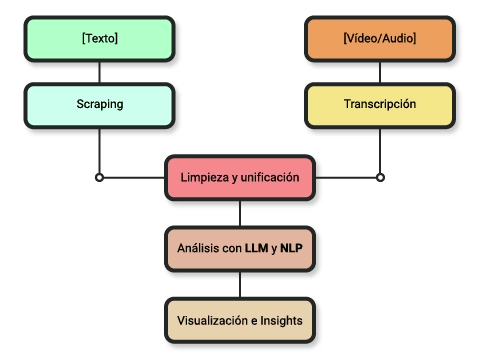

# 2. Extracción de datos

## 2.1. Instalación e importación de librerías

En este bloque se instalan e importan todas las librerías necesarias para el proyecto de **resumen multimodal sobre el impacto de la IA en el empleo**. La configuración incluye herramientas de scraping, descarga de vídeos, transcripción de audio, visualización de datos, gestión de archivos y conexión con la API de OpenAI.

In [ ]:
# ========================================================================
# Instalación e importación de librerías
# ========================================================================
# Librerías de scraping para artículos web
!pip install googlesearch-python --quiet  # Busqueda en Google desde Python
!pip install newspaper3k --quiet          # Extracción simplificada de artículos
!pip install requests --quiet             # Descarga de páginas web
!pip install lxml_html_clean --quiet      # Fix para newspaper3k (lxml clean)

# Imports de scraping
from googlesearch import search           # Búsquedas en Google con código
from bs4 import BeautifulSoup             # Tratamiento de HTML, busqueda de etiquetas, atributos, texto...
from newspaper import Article, Config     # Descargar y procesar articulos
import requests                           # Conectar y descargar de URLs
import feedparser                         # Leer y analizar feeds RSS.

# Imports de gestión de archivos
import os                                 # Crea carpetas, une rutas, etc.
import re                                 # Expresiones y limpieza de textos
import datetime                           # Guardar archivos según la fecha de ejecución
import time                               # Medida de tiempos y paradas de llamadas a API
import json                               # Trabajar con formatos json
import unicodedata                        # Manejo de caracteres especiales

# Definición de ruta en las que guardar archivos:
ruta_scraping = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping"

# Herramientas de descarga y transcripción de vídeo/audio
!pip install yt-dlp --quiet                                     # Descarga de vídeos de YouTube
!pip install git+https://github.com/openai/whisper.git --quiet  # Transcripción de audio

# Imports de vídeo/audio
import yt_dlp                                                   # Descargar vídeos, audios o listas de reproducción
from yt_dlp.utils import DownloadError, ExtractorError          # Gestión de errores en descarga y extracción
from yt_dlp import YoutubeDL                                    # Control de descarga
import whisper                                                  # Transcripción de audio a texto

# Visualización
!pip install matplotlib seaborn plotly --quiet                  # Gráficos y visualizaciones interactivas

# Imports de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelo LLM (Chat GPT de OpenAI)
!pip install openai --quiet

# API KEY
from google.colab import drive
drive.mount('/content/drive')

# Dotenv para proteger la API key
!pip install python-dotenv
from dotenv import load_dotenv

# Ruta de mi API KEY
# Más info: https://pypi.org/project/python-dotenv/
env_path = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/config/.env"

load_dotenv(env_path)
api_key = os.getenv("OPENAI_API_KEY")

if api_key is None:
    raise ValueError("No se ha encontrado la clave API.")

# Configuración de OpenAI
from openai import OpenAI
client = OpenAI(api_key=api_key)

# URL del webhook para MAKE desde archivo protegido
with open("/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/config/webhook.txt", "r") as f:
    webhook_url = f.read().strip()

print("Webhook cargado correctamente (oculto por seguridad).")


# Librerías adicionales útiles
!pip install pandas numpy tqdm --quiet          # Manipulación de datos y progreso

# Imports adicionales
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from collections import Counter
import requests
from typing import List, Dict, Tuple, Optional                 # Anotación de tipos de funciones
# Confirmación
print("Librerías instaladas e importadas correctamente.")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 83.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Webhook cargado correctamente (oculto por seguridad).
Librerías instaladas e importadas correcta

## 2.2. Fuentes textuales

A continuacion definiremos algunas funciones para hacer scraping de distintas fuentes de manera rápida y sencilla para así no tener que repetir el mismo código una y otra vez. Este script permite **extraer artículos** desde varios dominios (Xataka, MIT Tech Review, HBR, Wired) con este orden de búsqueda:
1. Google  
2. DuckDuckGo  
3. RSS del dominio  
4. (Si es HBR) buscador interno  
5. Portada (último recurso, solo Xataka)

Con esto nos aseguramos varios filtros y soluciones en caso de error.

Por un lado, mediante **REGEX (Regular Expressions)**, vamos a filtrar artículos que hablen de **IA y empleo** aunque sean mencionadas con sinonimos y filtrando si se menciona dentro de una misma palabra que significa otra cosa.

Por otro lado, con **newspaper3k** extraeremos el título, URL y texto.

Finalmente, Obtendremos los artículos en un **DataFrame de pandas**.

Para terminar, limpiaremos y acortaremos los títulos para usarlos como nombres de archivo y los guardaremos en ficheros `.txt` organizados en carpetas por **fecha y fuente**.

In [ ]:
# ========================================================================
# EXTRACCIÓN RESILIENTE DE ARTÍCULOS POR DOMINIO
# Google → DuckDuckGo → RSS (por dominio) → Portada (si hay)
# Soporta ES + EN (xataka.com, technologyreview.com, hbr.org, wired.com)
# ========================================================================

# ========================================================================
# 1) Configuración global
# ========================================================================

# RSS para sacar URLs de artículos de manera fácil y rápida
RSS_SOURCES = {
    "xataka.com": [
        "https://www.xataka.com/tag/inteligencia-artificial/rss2.xml",
        "https://www.xataka.com/tag/empleo/rss2.xml",
        "https://www.xataka.com/tag/trabajo/rss2.xml",
        "https://www.xataka.com/categoria/robotica-e-ia/rss2.xml",
        "https://www.xataka.com/categoria/empresas-y-economia/rss2.xml",
    ],
    "technologyreview.com": [
        "https://www.technologyreview.com/feed/",
    ],
    # Los RSS de HBR suelen fallan, pero los mantengo por si funcionan
    "hbr.org": [
        "https://hbr.org/feed",
        "https://feeds.hbr.org/harvardbusiness"
    ],
    "wired.com": [
        "https://www.wired.com/feed/rss",
    ],
}

# Página de portada por si falla (solo funciona con xataka)
PORTADA_SCRAPERS = {
    "xataka.com": "https://www.xataka.com/",
}

# Cabezeras para que el bot no sea bloqueado y parezca humano
HEADERS = {
    "User-Agent": "Mozilla/5.0", # Para parecer un navegador normal
    "Accept-Language": "es-ES,es;q=0.9,en-US;q=0.8,en;q=0.7", # Priorizamos español o inglés
}

# Tiempo de espera de respuesta para que el código no se quede congelado esperando indefinidamente
REQ_TIMEOUT = 25

# ========================================================================
# 2) Patrones multilingües (ES + EN) para el filtro estricto con cadenas regex buscando palabras clave
# ========================================================================

# IA (ES/EN)
_IA_ES = r"(?:inteligencia\s+artificial|IA|aprendizaje\s+autom[aá]tico|modelos?\s+generativos?|generativa)"
_IA_EN = r"(?:artificial\s+intelligence|AI|machine\s*learning|foundation\s+models?|large\s+language\s+models?|LLMs?|GPT|transformers?|diffusion)"
# Empleo/Trabajo (ES/EN)
_EMP_ES = r"(?:empleo|empleos|trabajo|trabajos|laboral(?:es)?|trabajador(?:es)?|contrataci[oó]n|contratar|despidos?|sueldo(?:s)?|salario(?:s)?|retribuci[oó]n|n[oó]mina(?:s)?|paro|oferta(?:s)?\s+de\s+empleo|mercado\s+laboral)"
_EMP_EN = r"(?:job(?:s)?|employment|work(?:place)?|labor|labour|workforce|hiring|recruit(?:ing|ment)|layoff(?:s)?|firing|wage(?:s)?|salary|pay(?:roll)?|compensation|unemployment|labor\s+market|labour\s+market)"

# Compila el borde de la palabra y ingora minus o mayus
IA_PAT_ES = re.compile(rf"\b{_IA_ES}\b", re.IGNORECASE)
IA_PAT_EN = re.compile(rf"\b{_IA_EN}\b", re.IGNORECASE)
EMP_PAT_ES = re.compile(rf"\b{_EMP_ES}\b", re.IGNORECASE)
EMP_PAT_EN = re.compile(rf"\b{_EMP_EN}\b", re.IGNORECASE)

# Función que si encuentra los terminos AI en título (t) o texto (x) será True
def _has_ai(t: str, x: str) -> bool:
    return bool(IA_PAT_ES.search(t or "") or IA_PAT_ES.search(x or "") or
                IA_PAT_EN.search(t or "") or IA_PAT_EN.search(x or ""))

# Función que si encuentra los terminos Empleo en título (t) o texto (x) será True
def _has_emp(t: str, x: str) -> bool:
    return bool(EMP_PAT_ES.search(t or "") or EMP_PAT_ES.search(x or "") or
                EMP_PAT_EN.search(t or "") or EMP_PAT_EN.search(x or ""))

# ========================================================================
# 3) Tema Estricto - Utilidades de matching/filtro
# ========================================================================

#
def _coincide_tema(titulo: str, texto: str, query: str = None, tema_estricto: bool = False) -> bool:
    """
    - tema_estricto=True: exige mención de IA (ES/EN) y Empleo/Trabajo (ES/EN) en título o texto.
    - tema_estricto=False: filtro 'suave' por términos de la query.
    """
    # Si t o x son None, lo dejamos vacio
    t, x = (titulo or ""), (texto or "")
    # Si el tema estricto está activo, utiliza _has_ai y _has_emp para devolver True si contiene las palabras clave
    if tema_estricto:
        return _has_ai(t, x) and _has_emp(t, x)
    # Si no hay query, se acepta todo
    if not query:
        return True
    # Partimos la query en palabras por espacios, descarta palabras cortas y mayús, y devuelve true si aparecen en "t" o "x"
    terms = [w for w in re.split(r"\s+", query.lower()) if len(w) > 2]
    tl, xl = t.lower(), x.lower()
    return any(w in tl for w in terms) or any(w in xl for w in terms)

# ========================================================================
# 4) Orígenes de URLs (Google / DDG / RSS / HBR search / Portada)
# ========================================================================

# -------------------------------------
# Función de busqueda en Google
# -------------------------------------
def _search_google(consulta: str, num_resultados: int = 15):
    # Hacemos un try para capturar errores
    try:
        return list(search(consulta, num_results=num_resultados))
    # En casp de error por captcha, timeout, etc: Devolvemos la lista vacia
    except Exception:
        return []

# -------------------------------------
# Función de busqueda con DuckDuckGo en caso de que Google falle
# -------------------------------------
def _search_ddg(consulta: str, max_res: int = 15):
    # Hacemos un try para capturar errores
    try:
        # Definimos la url del buscador
        url = "https://duckduckgo.com/html/"
        # usamos requests.get para obtener la web con la consulta
        r = requests.get(url, params={"q": consulta}, headers=HEADERS, timeout=REQ_TIMEOUT)
        # En caso de error lanzamos except
        r.raise_for_status()
        # Convertimos HTML a BeautifulSoup
        soup = BeautifulSoup(r.text, "html.parser")
        # Lista para guardar enlaces
        enlaces = []
        # Bucle de para guardar enlaces a la lista
        for a in soup.select("a.result__a"):
            href = a.get("href")
            if href and href.startswith("http"):
                enlaces.append(href)
            if len(enlaces) >= max_res:
                break
        # Devuelve la lista
        return enlaces
    # En caso de error por captcha, timeout, etc: Devolvemos la lista vacia
    except Exception:
        return []
# -------------------------------------
# Función de busqueda con RSS en caso de que DuckDuckGo falle
# -------------------------------------
def _rss_urls_for_domain(dominio: str, max_urls: int = 200):
    # Buscamos en RSS_SOURCES la lista de feeds RSS para el dominio
    fuentes = RSS_SOURCES.get(dominio, [])
    if not fuentes:
        return []
    # Lista vacía donde guardaremos URLs de artículos encontrados, si ya han sido vistos los descartamos
    urls, vistos = [], set()
    # Bucle para descargar archivos XML (RSS)
    for rss in fuentes:
        try:
            r = requests.get(rss, headers=HEADERS, timeout=REQ_TIMEOUT)
            r.raise_for_status()
            # Convertimos el RSS a feed para leerlos
            feed = feedparser.parse(r.content)
            # Bucle para sacar la URL del articulo del feed
            for e in feed.entries:
                link = e.get("link", "")
                if link and dominio in link and link not in vistos:
                    vistos.add(link); urls.append(link)
                if len(urls) >= max_urls:
                    return urls
        # En caso de error por captcha, timeout, etc: Devolvemos la lista vacia
        except Exception:
            continue
    return urls

# -------------------------------------
# Fallback para HBR (scraping por busqueda interna)
# -------------------------------------
def _hbr_search_urls(query="artificial intelligence jobs", max_pages=7, max_urls=200):
    # Buscador interno de hbr
    base = "https://hbr.org/search"
    # Parámetro de busqueda (term es el parámetro de hbr, ahí usaremos la query)
    params = {"term": query}
    # Lista vacía donde guardaremos URLs de artículos encontrados, si ya han sido vistos los descartamos
    vistos, urls = set(), []
    # Bucle de busqueda de páginas y recolección de urls
    for page in range(1, max_pages + 1):
        try:
            r = requests.get(base, params=(params if page == 1 else {**params, "page": page}),
                             headers=HEADERS, timeout=REQ_TIMEOUT)
            r.raise_for_status()
            soup = BeautifulSoup(r.text, "html.parser")
            for a in soup.find_all("a", href=True):
                href = a["href"]
                if href.startswith("/"):
                    href = "https://hbr.org" + href
                if href.startswith("https://hbr.org/") and re.search(r"https://hbr\.org/20\d{2}/", href):
                    if href not in vistos:
                        vistos.add(href); urls.append(href)
                        if len(urls) >= max_urls:
                            return urls
        # En caso de error por captcha, timeout, etc: Devolvemos la lista vacia
        except Exception:
            continue
    return urls

# -------------------------------------
# Función para sacar artículos directamente de la portada si todo lo anterior falla
# -------------------------------------
def _urls_desde_portada(dominio: str, max_urls: int = 60):
  # Si el dominio no está definido no da resultado
    if dominio not in PORTADA_SCRAPERS:
        return []
    # Recuperamos el dominio para la busqueda de enlaces
    url = PORTADA_SCRAPERS[dominio]
    r = requests.get(url, headers=HEADERS, timeout=REQ_TIMEOUT)
    r.raise_for_status()
    soup = BeautifulSoup(r.text, "html.parser")
    # Lista de posibles URLs
    candidatos = []
    # Nos aseguramos de uqe las URLS parezcan articulos individuales (Evita categorías o listados)
    patron_slug = rf"https://{re.escape(dominio)}/[^/]+/[^/#?]+"
    # Bucle de busqueda de enlaces con atributo href y recolección de links
    for a in soup.find_all("a", href=True):
        href = a["href"]
        # Limpiamos el link si le falta el https://
        if href.startswith("/"):
            href = f"https://{dominio}{href}"
        # El link será bueno si empieza por el dominio correcto, encaja con el patrón y no contiene listas, tags, etc.
        if (
            href.startswith(f"https://{dominio}/")
            and re.search(patron_slug, href)
            and not any(seg in href for seg in ["/tag/","/categoria/","/archivo/","/temas/","/search","#to-comments"])
        ):
            candidatos.append(href)
        # Rompemos el bucle cuando ya tengamos candidatos suficientes.
        if len(candidatos) >= max_urls:
            break
    # si ya han sido vistos los descartamos
    vistos, urls = set(), []
    for u in candidatos:
        if u not in vistos:
            vistos.add(u); urls.append(u)
    return urls

# ========================================================================
# 5) Extracción principal (Article)
# ========================================================================

def extraer_articulos(query: str,
                      dominio: str,
                      num_articulos: int = 5,
                      num_resultados: int = 15,
                      tema_estricto: bool = False) -> pd.DataFrame:
    """
    Extrae artículos de un dominio específico, de forma resiliente:
    1) Google → 2) DuckDuckGo → 3) RSS (si hay) → 3.5) HBR search (si hbr.org) → 4) Portada (si hay).
    Filtro 'tema_estricto' multilingüe (ES/EN) o filtro suave por query.
    Devuelve DataFrame con ['titulo', 'url', 'texto'].
    """
    consulta = f"{query} site:{dominio}"

    urls = _search_google(consulta, num_resultados=num_resultados)
    if not urls:
        urls = _search_ddg(consulta, max_res=num_resultados)
    if not urls:
        urls = _rss_urls_for_domain(dominio, max_urls=200)
    # Fallback específico para Harvard Business Review
    if not urls and dominio == "hbr.org":
        urls = _hbr_search_urls(query=query, max_pages=7, max_urls=200)
    if not urls:
        urls = _urls_desde_portada(dominio, max_urls=60)

    print(f"Total URLs candidatas: {len(urls)}")
    print(f"Buscando artículos en {dominio}...")

    cfg = Config()
    cfg.browser_user_agent = (
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
        "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    )
    cfg.request_timeout = REQ_TIMEOUT

    articulos = []
    for url in urls:
        if dominio not in url:
            continue
        # Evita listados, tags, búsquedas, etc.
        if any(seg in url for seg in ["/tag/","/topics/","/categoria/","/archivo/","/temas/","/search","/page/"]):
            continue
        try:
            art = Article(url, config=cfg)
            art.download()
            art.parse()
            if not art.text.strip():
                print(f"Descartada (sin texto): {url}")
                continue
            if not _coincide_tema(art.title, art.text, query=query, tema_estricto=tema_estricto):
                print(f"Descartada (no coincide con filtro): {url}")
                continue
            articulos.append({"titulo": art.title, "url": url, "texto": art.text})
            print(f"Artículo extraído: {art.title}")
            if len(articulos) >= num_articulos:
                break
        except Exception as e:
            print(f"Error extrayendo: {url} → {e}")

    df = pd.DataFrame(articulos)
    print(f"\nArtículos extraídos de {dominio}: {len(df)}")
    return df

In [ ]:
# ========================================================================
# Función de limpieza de títulos de noticia
# ========================================================================
def limpiar_nombre_archivo(titulo):
    """
    Función para limpiar el título y usarlo como nombre de archivo, para cuando
    se exporten las noticias en txt.
    """
    titulo = titulo.lower().strip()                  # Todo minusculas y sin espacios al inicio y final
    titulo = re.sub(r'[^\w\s-]', '', titulo)         # Elimina caracteres especiales
    titulo = re.sub(r'\s+', '_', titulo)             # Reemplaza espacios por "_"
    return titulo[:80] + ".txt"                      # Recorta nombres demasiado largos

In [ ]:
# ========================================================================
# Función de guardado de articulos en formato txt
# ========================================================================
def guardar_articulos_txt(df_articulos, nombre_carpeta, ruta_base=ruta_scraping):
    """
    Guarda los artículos de un DataFrame en archivos .txt dentro de una subcarpeta de fecha.

    Parámetros:
    - df_articulos: DataFrame con columnas ['titulo', 'url', 'texto']
    - nombre_carpeta: subcarpeta con el nombre de la fuente (ej. "xataka")
    - ruta_base: ruta principal donde se encuentra la carpeta de scraping (por defecto: ruta_scraping)
    """
    # Obtener la fecha actual en formato YYYY-MM-DD
    fecha_actual = datetime.datetime.now().strftime("%Y-%m-%d")

    # Construir la ruta final con fecha y nombre de fuente
    carpeta = os.path.join(ruta_base, fecha_actual, nombre_carpeta)
    os.makedirs(carpeta, exist_ok=True)

    for _, articulo in df_articulos.iterrows():
        nombre_archivo = limpiar_nombre_archivo(articulo["titulo"])
        ruta_archivo = os.path.join(carpeta, nombre_archivo)

        with open(ruta_archivo, "w", encoding="utf-8") as f:
            f.write(f"titulo: {articulo['titulo']}\n")
            f.write(f"url: {articulo['url']}\n\n")
            f.write(articulo["texto"])

        print(f"Guardado: {nombre_archivo}")

### 2.2.1. Scraping de Xataka

In [ ]:
# ========================================================================
# Extracción de artículos - Xataka
# ========================================================================
df_xataka = extraer_articulos("inteligencia artificial empleo", "xataka.com", num_articulos=5, tema_estricto=True)
guardar_articulos_txt(df_xataka, "xataka")

Total URLs candidatas: 27
Buscando artículos en xataka.com...
Descartada (no coincide con filtro): https://www.xataka.com/empresas-y-economia/apple-dio-cerrojazo-a-intel-hace-anos-ahora-intel-quiere-colarse-apple-claro-argumento-eeuu
Artículo extraído: Microsoft jamás ha sido tan valiosa en toda su historia. Y jamás ha estado tan cerca del abismo
Descartada (no coincide con filtro): https://www.xataka.com/robotica-e-ia/qualcomm-cree-que-6g-sera-red-definitiva-para-ia-le-ha-puesto-fecha-realidad-que-5g-esta-panales
Descartada (no coincide con filtro): https://www.xataka.com/domotica-1/xiaomi-continua-su-asalto-a-electrodomesticos-espanoles-frigorifico-lavadora-seran-siguientes
Descartada (no coincide con filtro): https://www.xataka.com/robotica-e-ia/project-stargate-sigue-siendo-quimera-quienes-estan-haciendo-probable-no-meta-google-microsoft
Artículo extraído: Una nueva generación de robots promete precisión y eficiencia. También abre la puerta a riesgos de ciberespionaje
Descartada (n

### 2.2.2. Scraping de MIT Technology Review

In [ ]:
# ========================================================================
# Extracción de artículos - MIT Technology Review
# ========================================================================
df_mit = extraer_articulos("artificial intelligence jobs", "technologyreview.com", num_articulos=5, tema_estricto=True)
guardar_articulos_txt(df_mit, "mit_tech_review")

Total URLs candidatas: 10
Buscando artículos en technologyreview.com...
Artículo extraído: The Download: growing threats to vulnerable languages, and fact-checking Trump’s medical claims
Descartada (no coincide con filtro): https://www.technologyreview.com/2025/09/25/1124050/fusion-future-funding/
Artículo extraído: How AI and Wikipedia have sent vulnerable languages into a doom spiral
Descartada (no coincide con filtro): https://www.technologyreview.com/2025/09/24/1124058/roundtables-the-future-of-birth-control/
Descartada (no coincide con filtro): https://www.technologyreview.com/2025/09/24/1124026/the-download-accidental-ai-relationships-and-future-contraception/
Descartada (no coincide con filtro): https://www.technologyreview.com/2025/09/24/1124029/trump-leucovorin-autism-tylenol/
Artículo extraído: The AI Hype Index: Cracking the chatbot code
Descartada (no coincide con filtro): https://www.technologyreview.com/2025/09/24/1123915/relationship-ai-without-seeking-it/
Descartada (no

### 2.2.3. Scraping de Harvard Business Review

In [ ]:
# ========================================================================
# Extracción de artículos - Harvard Business Review
# ========================================================================
df_hbr = extraer_articulos("artificial intelligence jobs", "hbr.org", num_articulos=5, tema_estricto=False)
guardar_articulos_txt(df_hbr, "hbr")

Total URLs candidatas: 3
Buscando artículos en hbr.org...
Artículo extraído: Artificial Intelligence for the Real World
Artículo extraído: Harnessing Artificial Intelligence
Artículo extraído: How Artificial Intelligence Will Redefine Management

Artículos extraídos de hbr.org: 3
Guardado: artificial_intelligence_for_the_real_world.txt
Guardado: harnessing_artificial_intelligence.txt
Guardado: how_artificial_intelligence_will_redefine_management.txt


### 2.2.4. Scraping de Wired

In [ ]:
# ========================================================================
# Extracción de artículos - Wired
# ========================================================================
df_wired = extraer_articulos("artificial intelligence jobs", "wired.com", num_articulos=5, tema_estricto=True)
guardar_articulos_txt(df_wired, "wired")

Total URLs candidatas: 50
Buscando artículos en wired.com...
Descartada (no coincide con filtro): https://www.wired.com/gallery/best-magsafe-accessories/
Descartada (no coincide con filtro): https://www.wired.com/story/chromebooks-vs-windows-laptops/
Descartada (no coincide con filtro): https://www.wired.com/review/alltrails-hiking-app/
Descartada (no coincide con filtro): https://www.wired.com/gallery/best-cheap-laptops/
Descartada (no coincide con filtro): https://www.wired.com/gallery/best-down-comforters/
Descartada (no coincide con filtro): https://www.wired.com/story/how-to-mostly-get-rid-of-liquid-glass/
Descartada (no coincide con filtro): https://www.wired.com/gallery/best-bed-frames/
Descartada (no coincide con filtro): https://www.wired.com/story/google-photos-conversational-photo-editor/
Descartada (no coincide con filtro): https://www.wired.com/story/memecoins-are-coming-to-the-stock-market/
Descartada (no coincide con filtro): https://www.wired.com/story/6000-planets-have

## 2.3. Fuentes Audiovisuales

A continuación tenemos un bloque de código que automatiza el proceso de **buscar vídeos en YouTube** y **descargar sus audios en formato MP3** de forma ordenada y sin fricciones.

El flujo está dividido en varias partes:

1. **Configuración global**  
   Definimos las rutas en Google Drive, un archivo de cookies (para evitar captchas y restricciones de edad) y las cabeceras HTTP que hacen que nuestras peticiones parezcan las de un navegador real.

2. **Utilidades de ruta**  
   Creamos funciones para generar carpetas organizadas por fecha y para limpiar los títulos de los vídeos, de modo que se conviertan en nombres de archivo seguros y compatibles.

3. **Opciones de yt-dlp**  
   Ajustamos la configuración de la librería `yt-dlp` para que las búsquedas sean rápidas y poco intrusivas, y para que las descargas sean estables.  
   Además, usaremos FFmpeg para convertir automáticamente el audio a **MP3 de 192 kbps**.

4. **Búsqueda de vídeos en YouTube**  
   A partir de una query, el sistema obtiene resultados filtrados por duración máxima y los ordena por fecha de subida. Así pues, logramos una lista de vídeos con sus metadatos básicos (título, duración, fecha, URL…).

5. **Descarga individual de audio**  
   Con una URL concreta, descargamos el audio del vídeo en MP3, y le asignamos un nombre limpio y la ruta final del archivo.

6. **Descarga en lote**  
   Recorremos una lista de vídeos y descargaramos todos sus audios en MP3, mostrando un pequeño resumen del número de descargas correctas frente a las fallidas.

In [ ]:
# ============================================================
# YOUTUBE SCRAPING (BÚSQUEDA + DESCARGA AUDIO MP3)
# ============================================================

# ============================================================
# 1) CONFIGURACIÓN GLOBAL
# ============================================================

# Ruta de Drive donde guardaremos audios y transcripciones
RUTA_BASE_SCRAPING = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping"

# Archivo de cookies para evitar fricción/captcha y ver vídeos con restricción de edad.
COOKIE_FILE = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/config/all_cookies.txt"

# Cabeceras y opciones de red para reducir bloqueos
COMMON_HTTP_HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/124.0.0.0 Safari/537.36"
    )
}

# ============================================================
# 2) UTILIDADES DE RUTA
# ============================================================

def preparar_carpeta_videos(ruta_base: str = RUTA_BASE_SCRAPING) -> str:
    """
    Crea la carpeta: <ruta_base>/<YYYY-MM-DD>/videos y la devuelve.
    """
    # Obtenemos la fecha actual
    fecha_actual = datetime.datetime.now().strftime("%Y-%m-%d")
    # Creamos la ruta completa
    carpeta_videos = os.path.join(ruta_base, fecha_actual, "videos")
    # Creamos la carpeta en el sistema de archivos si no existe
    os.makedirs(carpeta_videos, exist_ok=True)
    return carpeta_videos

def limpiar_nombre_archivo(titulo: str, max_len: int = 120) -> str:
    """
    Normaliza Unicode y sustituye puntuación 'rara' por caracteres seguros.
    Mantiene acentos (Drive los soporta), pero elimina símbolos problemáticos.
    """
    # En Si no hay título, lo llamaremos "audio" para evitar errores
    if not titulo:
        return "audio"

    # Normalizamos a NFC (conserva acentos correctos)
    # Ejemplo: "café" puede estar almacenado con la “e” + "´". NFC convierte todo al carácter "é"
    nombre = unicodedata.normalize("NFC", titulo).strip()

    # Mapeamos signos comunes a equivalentes seguros/ASCII
    reemplazos = {
        "¿": "", "¡": "", "：": ":", "—": "-", "–": "-",
        "｜": "|", "·": "-", "…": "...", "”": '"', "“": '"', "’": "'",
        "´": "'", "•": "-", "、": ",", "：": ":", "’": "'",
    }
    # Bucle para sustituir simbolos por versiones seguras
    for k, v in reemplazos.items():
        nombre = nombre.replace(k, v)

    # Eliminamos caracteres peligrosos para rutas (Windows/mac/Unix)
    nombre = re.sub(r'[\\/*?:"<>|#%{}[\]\^~`+=$@!]', "_", nombre)

    # Colapsamos espacios y recortamos
    nombre = re.sub(r"\s+", " ", nombre).strip()
    if len(nombre) > max_len:
        nombre = nombre[:max_len].rstrip()

    return nombre or "audio"

# =======================================
# 3) OPCIONES FLEXIBLES PARA yt-dlp
# =======================================

# Fijamos opciones comunes a búsquedas: planas (no entrar a cada vídeo) para evitar bot-checks.
YDL_SEARCH_FIX = {
    "quiet": True,                       # No imprimimos logs
    "skip_download": True,               # Sin descargas, solo info
    "noplaylist": True,                  # No procesamos playlists
    "extract_flat": True,                # No abrimos cada vídeo durante la búsqueda (reduce fricción)
    "process": False,                    # Resultados rápdios y planos
    "ignoreerrors": True,                # Si un ID falla, lo salta
    "force_ipv4": True,                  # Usamos ipv4 porque algunos videos fallan con ipv6
    "http_headers": COMMON_HTTP_HEADERS, # Enviamos cabeceras para fingir ser un usuario (evitar bloqueos)
    "retries": 3,                        # Reintentamos 3 veces por petición fallida
    "default_search": "ytsearch",        # Cambiamos a "ytsearchdate" para priorizar frescura
}

# Si hay cookiefile, lo añade automáticamente para evitar captchas
if os.path.exists(COOKIE_FILE):
    YDL_SEARCH_FIX["cookiefile"] = COOKIE_FILE

# Opciones para descarga de AUDIO (MP3) con FFmpeg
def _build_download_opts(carpeta_destino: str) -> dict:
    """
    Añade fallback de player_client: primero 'tv' y luego 'web' para evitar el warning SABR.
    Ventajas: 'tv' suele saltarse restricciones, no muestra anuncios, y evita el aviso "Sign in to confirm your age".
    Pero puede falla por SABR (Signature and Blocked Requests) de YouTube, que detecta y bloquea peticiones sospechosas.
    Si 'tv' falla, automáticamente cambia a 'web' el método más compatible, pero más propenso a bloqueos o limitaciones.
    """
    opts = {
        "quiet": True,                       # No imprimimos logs
        "skip_download": False,              # Activamos la descarga
        "format": "bestaudio/best",          # El mejor formato de audio posible
        "noplaylist": True,                  # No procesamos playlists
        "retries": 3,                        # Reintentamos 3 veces por petición fallida
        "force_ipv4": True,                  # Usamos ipv4 porque algunos videos fallan con ipv6
        "http_headers": COMMON_HTTP_HEADERS, # Enviamos cabeceras para fingir ser un usuario (evitar bloqueos)
        #-----------------------------------------------------------------------------------------------------
        # Fallback de clientes: si 'tv' se ve afectado por SABR, probará 'web'
        "extractor_args": {"youtube": {"player_client": ["tv", "web"]}},
        # Plantilla de nombre de archivo (limpiaremos el título después)
        "outtmpl": os.path.join(carpeta_destino, "%(title).150s.%(ext)s"),
        "postprocessors": [{
            "key": "FFmpegExtractAudio",
            "preferredcodec": "mp3",
            "preferredquality": "192",
        }],
        # No romper el bucle ante errores puntuales de descarga
        "ignoreerrors": "only_download",
    }
    # Añadimos cookies si están disponibles
    if os.path.exists(COOKIE_FILE):
        opts["cookiefile"] = COOKIE_FILE
    return opts

# =================================
# 4) BÚSQUEDA DE VÍDEOS EN YOUTUBE
# =================================

def buscar_videos_youtube(
    query: str = "inteligencia artificial empleo", # Búsqueda en YouTube
    max_duracion: int = 900,                       # Duracón máx. en segundos: 900 = 15 min
    num_resultados: int = 5,                       # Resultados necesarios
    multiplicador_busqueda: int = 6                # Busca más de lo necesario y luego filtra
# Devuelve una lista de diccionarios (uno por vídeo)
) -> List[Dict]:
    """
    Devuelve una lista de dicts con metadatos básicos del vídeo:
    ['fuente','titulo','duracion_seg','subido_en','url','texto','Entidades_GPT','Oraciones_clave']
    """
    limite = max(10, num_resultados * multiplicador_busqueda)
    ydl_opts = {
        "format": "bestaudio/best",                # Mejor calidad de audio
        "playlistend": limite,                     # Limita items a procesar
    }
    ydl_opts.update(YDL_SEARCH_FIX)                # Opciones comunes

    # Lista donde guardaremos los resultados
    videos: List[Dict] = []

    # Ejecutamos la busqueda
    try:
        with YoutubeDL(ydl_opts) as ydl:
            search_spec = f"ytsearch{limite}:{query}"
            info = ydl.extract_info(search_spec, download=False) or {}
            entries = info.get("entries", []) or []
    # Si falla la busqueda, devolvemos la lista vacía
    except Exception as e:
        print(f"[buscar_videos_youtube] Error buscando: {e}")
        return []

    # Bucle que recorre videos NO ERRONEOS
    for e in entries:
        if not e:
            continue
        dur = int(e.get("duration") or 0)
        # Filtramos la duración máx
        if dur and dur <= max_duracion:
            title = e.get("title") or "video"
            upload_date = e.get("upload_date") or ""     # YYYYMMDD (string)
            vid_id = e.get("id")
            # Obtenemos la url del video
            url = e.get("webpage_url") or (f"https://www.youtube.com/watch?v={vid_id}" if vid_id else None)
            # Si no está la URL, la contruimos usando el id
            if not url:
                continue
            # Si tampoco hay URL saltamos y construimos el diccionario
            videos.append({
                "fuente": "youtube",
                "titulo": title,
                "duracion_seg": dur,
                "subido_en": upload_date,
                "url": url,
                "texto": None,               # Será rellenado luego con la transcripción
                "Entidades_GPT": None,       # NER posterior
                "Oraciones_clave": None      # extractor posterior
            })

    # Ordena por fecha de subida (desc) y recorta
    videos = sorted(videos, key=lambda x: x.get("subido_en", ""), reverse=True)
    return videos[:num_resultados]

# ==================================
# 5) DESCARGA INDIVIDUAL DE AUDIO
# ==================================

def descargar_audio(video_url: str, carpeta_destino: str) -> Optional[str]:
    """
    Descarga el audio del vídeo como MP3 y devuelve la ruta del archivo (o None si falla).
    """
    # Creamos carpeta de destino si no existe
    os.makedirs(carpeta_destino, exist_ok=True)

    # Preparamos las opciones de descarga de audio para yt-dlp
    ydl_opts = _build_download_opts(carpeta_destino)

    # Con la configuración correcta, creamos la ruta del MP3
    try:
        with YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(video_url, download=True)
            # yt-dlp da el nombre real del archivo descargado
            final_path = os.path.splitext(ydl.prepare_filename(info))[0] + ".mp3"
            # Renombramos con nombre limpio
            base_dir = os.path.dirname(final_path)
            clean = limpiar_nombre_archivo(os.path.splitext(os.path.basename(final_path))[0]) + ".mp3"
            clean_path = os.path.join(base_dir, clean)
            # Si el nombre limpio es erroneo, renombramos el archivo
            if clean_path != final_path:
                try:
                    os.replace(final_path, clean_path)
                    final_path = clean_path
                except Exception:
                    pass
            # Obtenemos la ruta final
            return final_path
    # Gestión de errores
    except (DownloadError, ExtractorError) as e:
        print(f"[SKIP] {video_url}: {e}")
        return None
    except Exception as e:
        print(f"[ERROR] {video_url}: {e}")
        return None

# ================================
# 6) DESCARGA EN LOTE (LISTA)
# ================================

def descargar_audios_en_lote(videos: List[Dict], carpeta_destino: str) -> List[str]:
    """
    Recorre la lista de vídeos (dicts con 'url') y descarga el MP3 de cada uno.
    Devuelve la lista de rutas de MP3.
    """
    # Lista vacía para guardar rutas de audios descargados
    rutas: List[str] = []
    # Bucle de descarga
    for v in videos:
        url = v.get("url")
        if not url:
            continue
        print(f"Descargando: {v.get('titulo','(sin título)')}")
        mp3 = descargar_audio(url, carpeta_destino)
        if mp3:
            rutas.append(mp3)
            print(f"OK: {mp3}")
        else:
            print(f"Falló: {url}")
    print(f"\nDescargas OK: {len(rutas)}/{len(videos)}")
    return rutas


### 2.3.1. Scraping de YouTube

In [ ]:
# ========================================================================
# Ejecutar Scraping
# ========================================================================
query = "inteligencia artificial empleo"
videos = buscar_videos_youtube(query, max_duracion=900, num_resultados=5)
carpeta = preparar_carpeta_videos(RUTA_BASE_SCRAPING)
rutas_mp3 = descargar_audios_en_lote(videos, carpeta)

Descargando: 50% of jobs will be replaced by AI by 2030


ERROR: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/El 50% del empleo será sustituido por IA antes de 2030.webm' -> '/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/El 50% del empleo será sustituido por IA antes de 2030.webm'


[ERROR] https://www.youtube.com/watch?v=6ie3OUPcCqs: 'NoneType' object has no attribute 'setdefault'
Falló: https://www.youtube.com/watch?v=6ie3OUPcCqs
Descargando: ¿La IA reemplazará tu trabajo? ¡Prepárate con estas estrategias!
OK: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/La IA reemplazará tu trabajo？ Prepárate con estas estrategias_.mp3
Descargando: Trabajadores de datos: el costo humano de la inteligencia
OK: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/Trabajadores de datos_ el costo humano de la inteligencia.mp3
Descargando: Trabajos del Futuro: Inteligencia Artificial y Empleo en España #shorts
OK: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/Trabajos del Futuro_ Inteligencia Artificial y Empleo en España _shorts.mp3
Descargando: Los tres trabajos que según Bill Gates sobrevivirán a la inteligencia artif

###2.3.2 Transcripción con Whisper

Ahora que tenemos el audio de los videos descargado, vamos a transformarlos en texto usando **Whisper**, el modelo de reconocimiento de voz de OpenAI.  

Lo harémos de esta manera:

1. **Emparejar audios con sus vídeos**  
   Vinculamos cada archivo MP3 con la información del vídeo del que proviene (título, URL, fecha…).  

2. **Elegir el dispositivo de trabajo**  
   Si hay una GPU disponible, Whisper la aprovechará para acelerar la transcripción. Si no, se usará la CPU.  

3. **Organizar la carpeta de salida**  
   Creamos (o verificamos) la carpeta donde guardaremos todas las transcripciones en formato `.txt`.  

4. **Transcribir y guardar resultados**  
   Para cada audio, ejecutamos la transcripción automática. Después, guardamos un archivo de texto con el contenido reconocido y algunos metadatos del vídeo. Al final, tendremos una colección de transcripciones limpias y listas para análisis posteriores.  

In [ ]:
# ========================================================================
# Transcribir con Whisper y guardar en .txt
# ========================================================================

# ================================
# 1) Emparejar vídeos y rutas mp3
# ================================

# Ponemos las rutas de los audios en una lista
rutas_audio: List[Tuple[Dict, str]] = list(zip(videos, rutas_mp3))

# ================================
# 2) Selección de dispositivo y carga del modelo (GPU o CPU)
# ================================

# Comprobamos si la GPU está disponible, si no, usamos CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo Whisper: {device}")
# Usamos el modelo base de Whisper
modelo_whisper = whisper.load_model("base", device=device)

# ================================
# 3) Carpeta de salida
# ================================

# Crear o recuperar la carpeta de salida
carpeta_videos = preparar_carpeta_videos()
assert os.path.isdir(carpeta_videos), "carpeta_videos no existe. Crea con preparar_carpeta_videos()"

# ================================
# 4) Transcribir en bucle y guardar .txt
# ================================

# Lista vacia para guardar las transcripciones
transcripciones = []

# Bucle de rutas de audio con gestion de errores
for video, ruta_mp3 in rutas_audio:
    try:
        # Tomamos el nombre del archivo
        nombre_audio = os.path.basename(ruta_mp3)
        print(f"Transcribiendo: {nombre_audio}")

        # Ejecutamos la transcripción
        resultado = modelo_whisper.transcribe(
            ruta_mp3,
            fp16=(device == "cuda"), # Si hay GPU usamos fp16.
            language=None,           # Autodetección del lenguaje (ES/EN)
            temperature=0.0          # Transcripción determinista y estable
        )

        # Guardamos la transcripción como .txt con metadatos
        nombre_txt = os.path.splitext(nombre_audio)[0] + ".txt"
        ruta_txt = os.path.join(carpeta_videos, nombre_txt)

        with open(ruta_txt, "w", encoding="utf-8") as f:
            f.write(f"Título: {video.get('titulo','')}\n")
            f.write(f"URL: {video.get('url','')}\n")
            f.write(f"Subido: {video.get('subido_en','')}\n")
            f.write(f"Duración: {video.get('duracion_seg','')} segundos\n\n")
            f.write(resultado.get("text","").strip())

        # Añadimos un diccionario con los datos y la transcripción
        transcripciones.append({
            "fuente": "youtube",
            "titulo": video.get("titulo",""),
            "url": video.get("url",""),
            "texto": resultado.get("text","").strip(),
            "Entidades_GPT": None,
            "Oraciones_clave": None
        })
        print(f"Guardado: {ruta_txt}")

    except Exception as e:
        print(f"Error con {ruta_mp3}: {e}")

print(f"\nTranscripciones OK: {len(transcripciones)}/{len(rutas_audio)}")


Usando dispositivo Whisper: cpu
Transcribiendo: La IA reemplazará tu trabajo？ Prepárate con estas estrategias_.mp3
Guardado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/La IA reemplazará tu trabajo？ Prepárate con estas estrategias_.txt
Transcribiendo: Trabajadores de datos_ el costo humano de la inteligencia.mp3
Guardado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/Trabajadores de datos_ el costo humano de la inteligencia.txt
Transcribiendo: Trabajos del Futuro_ Inteligencia Artificial y Empleo en España _shorts.mp3
Guardado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/scraping/2025-09-25/videos/Trabajos del Futuro_ Inteligencia Artificial y Empleo en España _shorts.txt
Transcribiendo: Los tres trabajos que según Bill Gates sobrevivirán a la inteligencia artificial.mp3
Guardado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_res

In [ ]:
# Convertimos los resultados a DataFrame
df_videos = pd.DataFrame(transcripciones)
df_videos.head()

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave
0,youtube,50% of jobs will be replaced by AI by 2030,https://www.youtube.com/watch?v=6ie3OUPcCqs,¿Y ustedes tienen miedo de perder su trabajo p...,None,None
1,youtube,¿La IA reemplazará tu trabajo? ¡Prepárate con ...,https://www.youtube.com/watch?v=sIM6_PsMmC0,La inteligencia artificial forma parte de nues...,None,None
2,youtube,Trabajadores de datos: el costo humano de la i...,https://www.youtube.com/watch?v=hw7kVyxaPD0,Eso es lo que nos deparan el futuro. También s...,None,None
3,youtube,Trabajos del Futuro: Inteligencia Artificial y...,https://www.youtube.com/watch?v=NaNWfgR8Gz8,Llegó la obra techno y para eso la vamos a bie...,None,None


# 3. Procesamiento y Análisis NER

Una vez tenemos todos los datos recolectados, vamos a unificarlos para poder analizarlos y extraer entidades y oraciones clave que nos ayuden a entenderlos mejor y posteriormente, a visualizarlos.

## 3.1. Fuentes textuales

### 3.1.1. Unificación de los artículos

En este paso vamos a reunir en un único DataFrame todos los artículos que hemos obtenido de distintas fuentes (Xataka, Wired, MIT Tech Review, etc.).  

La función se encargará de:  
- **Normalizar las columnas**: aunque cada fuente nombre sus campos de manera distinta (`title`, `headline`, `content`…), aquí los convertimos a un formato común (`titulo`, `url`, `texto`).  
- **Añadir metadatos extra**: como la fuente de donde viene el artículo, y columnas vacías que después completaremos con entidades detectadas y oraciones clave.  
- **Unificar todo en un solo DataFrame**: juntamos los artículos de todas las fuentes en una tabla única.  
- **Limpieza básica**: eliminamos textos vacíos y, si es necesario, quitamos duplicados (según la URL).  

El resultado es un dataset homogéneo de artículos listos para ser analizados, comparados y procesados en los siguientes pasos del proyecto.

In [ ]:
# ========================================================================
# Unificación de los artículos
# ========================================================================

def unir_articulos(dfs: dict,
                   dedup_on: str = "url",
                   drop_empty_text: bool = True) -> pd.DataFrame:
    """
    Une múltiples DataFrames de artículos en un único DataFrame con columnas:
    ['fuente','titulo','url','texto','Entidades_GPT','Oraciones_clave'].
    Devuelve: pd.DataFrame
    """
    # Mapeos por si alguna fuente trae nombres distintos
    cols_map = {
        'title': 'titulo', 'Title': 'titulo', 'headline': 'titulo',
        'link': 'url', 'Link': 'url', 'href': 'url',
        'content': 'texto', 'body': 'texto', 'article': 'texto', 'texto': 'texto'
    }

    frames = []
    for fuente, df in dfs.items():
        tmp = df.copy()

        # Renombrar columnas si es necesario
        ren = {k: v for k, v in cols_map.items() if k in tmp.columns and v not in tmp.columns}
        if ren:
            tmp = tmp.rename(columns=ren)

        # Asegurar columnas mínimas
        for col in ['titulo', 'url', 'texto']:
            if col not in tmp.columns:
                tmp[col] = ""

        # Selección y orden
        tmp = tmp[['titulo', 'url', 'texto']].copy()

        # Añadir metadatos requeridos
        tmp.insert(0, 'fuente', str(fuente).lower())
        tmp['Entidades_GPT'] = None
        tmp['Oraciones_clave'] = None

        frames.append(tmp)

    # Unir
    out = pd.concat(frames, ignore_index=True)

    # Limpiar
    if drop_empty_text:
        out = out[out['texto'].astype(str).str.strip().ne('')]

    if dedup_on:
        out = out.drop_duplicates(subset=[dedup_on])

    return out.reset_index(drop=True)

Vamos a revisar nuestros DataFrames para verificar que está todo correcto antes de continuar con un `.head()`. Si todo está bien, ejecutamos la unificación.

In [ ]:
df_xataka.head()

,titulo,url,texto
0,Microsoft jamás ha sido tan valiosa en toda su...,https://www.xataka.com/empresas-y-economia/mic...,"El primer ordenador de Satya Nadella, CEO de M..."
1,Una nueva generación de robots promete precisi...,https://www.xataka.com/robotica-e-ia/nueva-gen...,El movimiento del brazo robótico parece impeca...
2,"Hay muchas carreras ""internas"" dentro de la gr...",https://www.xataka.com/robotica-e-ia/alibaba-s...,El gigante chino Alibaba ha lanzado oficialmen...
3,EEUU tiene un mensaje para los que le dieron l...,https://www.xataka.com/magnet/eeuu-ha-enviado-...,No es ningún secreto que el verano del F-35 de...
4,"""Hay que recordarle a la gente que ellos traba...",https://www.xataka.com/empresas-y-economia/hay...,A estas alturas ya nadie duda que la adopción ...


In [ ]:
df_mit.head()

,titulo,url,texto
0,The Download: growing threats to vulnerable la...,https://www.technologyreview.com/2025/09/25/11...,How AI and Wikipedia have sent vulnerable lang...
1,How AI and Wikipedia have sent vulnerable lang...,https://www.technologyreview.com/2025/09/25/11...,This could have significant repercussions in c...
2,The AI Hype Index: Cracking the chatbot code,https://www.technologyreview.com/2025/09/24/11...,Separating AI reality from hyped-up fiction is...
3,The Download: AI’s retracted papers problem,https://www.technologyreview.com/2025/09/23/11...,I’ve combed the internet to find you today’s m...


In [ ]:
df_hbr.head()

,titulo,url,texto
0,Artificial Intelligence for the Real World,https://hbr.org/2018/01/artificial-intelligenc...,"In 2013, the MD Anderson Cancer Center launche..."
1,Harnessing Artificial Intelligence,https://hbr.org/2020/05/harnessing-artificial-...,"I’ve always loved movie robots, even the bad o..."
2,How Artificial Intelligence Will Redefine Mana...,https://hbr.org/2016/11/how-artificial-intelli...,Many alarms have sounded on the potential for ...


In [ ]:
df_wired.head()

,titulo,url,texto
0,30 Best Early Amazon Prime Day Deals on WIRED-...,https://www.wired.com/story/early-prime-day-de...,"It's that time of year again, and Prime Day de..."
1,Meta Poaches OpenAI Scientist to Help Lead AI Lab,https://www.wired.com/story/meta-poaches-opena...,Mark Zuckerberg has poached a high-ranking Ope...
2,9 Best Robot Vacuums (2025): Tested and Review...,https://www.wired.com/gallery/best-robot-vacuums/,Compare Top 9 Robot Vacuums\n\nModel Navigatio...
3,Larry Ellison Is a ‘Shadow President’ in Donal...,https://www.wired.com/story/larry-ellison-is-a...,"In Trumpworld, Larry Ellison gets more credit ..."
4,A Former Apple Luminary Sets Out to Create the...,https://www.wired.com/story/semiconductor-soft...,At a certain point between building Apple’s de...


In [ ]:
# ========================================================================
# Ejecución de la unificación
# ========================================================================
df_articulos = unir_articulos({
    'xataka': df_xataka,
    'mit': df_mit,
    'hbr': df_hbr,
    'wired': df_wired
})

Verificamos que hemos unido los DataFrames correctamente visualizando las dos primeras fuentes con un`.head(10)`.

In [ ]:
df_articulos.head(10)

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave
0,xataka,Microsoft jamás ha sido tan valiosa en toda su...,https://www.xataka.com/empresas-y-economia/mic...,"El primer ordenador de Satya Nadella, CEO de M...",None,None
1,xataka,Una nueva generación de robots promete precisi...,https://www.xataka.com/robotica-e-ia/nueva-gen...,El movimiento del brazo robótico parece impeca...,None,None
2,xataka,"Hay muchas carreras ""internas"" dentro de la gr...",https://www.xataka.com/robotica-e-ia/alibaba-s...,El gigante chino Alibaba ha lanzado oficialmen...,None,None
3,xataka,EEUU tiene un mensaje para los que le dieron l...,https://www.xataka.com/magnet/eeuu-ha-enviado-...,No es ningún secreto que el verano del F-35 de...,None,None
4,xataka,"""Hay que recordarle a la gente que ellos traba...",https://www.xataka.com/empresas-y-economia/hay...,A estas alturas ya nadie duda que la adopción ...,None,None
5,mit,The Download: growing threats to vulnerable la...,https://www.technologyreview.com/2025/09/25/11...,How AI and Wikipedia have sent vulnerable lang...,None,None
6,mit,How AI and Wikipedia have sent vulnerable lang...,https://www.technologyreview.com/2025/09/25/11...,This could have significant repercussions in c...,None,None
7,mit,The AI Hype Index: Cracking the chatbot code,https://www.technologyreview.com/2025/09/24/11...,Separating AI reality from hyped-up fiction is...,None,None
8,mit,The Download: AI’s retracted papers problem,https://www.technologyreview.com/2025/09/23/11...,I’ve combed the internet to find you today’s m...,None,None
9,hbr,Artificial Intelligence for the Real World,https://hbr.org/2018/01/artificial-intelligenc...,"In 2013, the MD Anderson Cancer Center launche...",None,None


### 3.1.2. Análisis de entidades clave (NER)

En esta sección aplicaremos **Reconocimiento de Entidades Nombradas (NER)** sobre los artículos recopilados.

El objetivo es identificar y clasificar automáticamente los elementos más relevantes relacionados con el impacto de la inteligencia artificial en el empleo. Para ello, utilizamos un **prompt diseñado específicamente para ChatGPT**, que extrae información de cada texto y la organiza en categorías claras:

- **Sectores laborales**  
- **Profesiones**  
- **Empresas o instituciones**  
- **Países o regiones**  
- **Tecnologías o herramientas de IA**  

Cada artículo se procesa de manera independiente y el resultado se devuelve en formato **JSON limpio**, lo que facilita integrarlo directamente en nuestro DataFrame. Así, añadimos una nueva columna con las entidades detectadas, que después podremos analizar de forma comparativa entre fuentes.


In [ ]:
# ========================================================================
# PROMPT para ejecutar el NER con ChatGPT (forzando JSON puro)
# ========================================================================
PROMPT_NER = """
Extrae las entidades clave del siguiente artículo relacionadas con el impacto de la inteligencia artificial en el empleo.

Clasifícalas en las siguientes categorías y devuélvelas ÚNICAMENTE en JSON válido y limpio,
sin comentarios, sin explicaciones y SIN usar bloques de código (sin ```json ni ```).

Categorías:
- "Sectores laborales"
- "Profesiones"
- "Empresas o instituciones"
- "Países o regiones"
- "Tecnologías o herramientas de IA"

Si alguna categoría no aparece, pon una lista vacía [].

Texto:
\"\"\"
{texto}
\"\"\"
"""


In [ ]:
# ========================================================================
# Función de configuración de NER con Chat GPT
# ========================================================================
def extraer_entidades_con_gpt(texto, modelo="gpt-4o-mini", temperatura=0.0):
    prompt = PROMPT_NER.format(texto=texto[:3000])  # Truncamos por seguridad

    try:
        response = client.chat.completions.create(
            model=modelo,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperatura
        )
        contenido = response.choices[0].message.content.strip()
        entidades = json.loads(contenido)
        return entidades

    except json.JSONDecodeError:
        print("Error: El contenido devuelto no es JSON válido.")
        print(contenido)
        return None
    except Exception as e:
        print(f"Error de API: {e}")
        return None

In [ ]:
# ========================================================================
# Ejecución del NER
# ========================================================================
df_articulos["Entidades_GPT"] = df_articulos["texto"].apply(extraer_entidades_con_gpt)

Comprobación rápida de los resultados:

In [ ]:
df_articulos["Entidades_GPT"].iloc[15]

{'Sectores laborales': [],
 'Profesiones': [],
 'Empresas o instituciones': ['Oracle',
  'Skydance',
  'Paramount',
  'CBS',
  'CNN',
  'Warner Bros. Discovery'],
 'Países o regiones': ['Estados Unidos'],
 'Tecnologías o herramientas de IA': ['aplicaciones en la nube',
  'bases de datos',
  'servidores']}

### 3.1.4. Extracción de oraciones clave

En este apartado buscamos **resumir cada artículo en pocas frases esenciales**. En lugar de leer todo el texto completo, vamos a identificar rápidamente cuáles son las ideas más relevantes relacionadas con el impacto de la inteligencia artificial en el empleo.

Para lograrlo, usamos un **prompt específico para ChatGPT** que selecciona entre **3 y 5 oraciones clave**.  
Cada una de ellas debe contener una idea completa y centrarse en aspectos como:  
- profesiones en riesgo o en transformación,  
- sectores más afectados,  
- oportunidades laborales emergentes gracias a la IA.  

El resultado se devuelve en formato **JSON con una lista de frases**, lo que nos permite añadir una nueva columna al DataFrame.  
Así, cada artículo queda acompañado de un pequeño extracto de frases representativas que facilitan la consulta y el análisis posterior.


In [ ]:
# ========================================================================
# PROMPT para ejecutar la extracción de oraciones clave con Chat GPT
# ========================================================================
PROMPT_ORACIONES_CLAVE = """
Extrae entre 3 y 5 oraciones clave del siguiente artículo.

Cada oración debe expresar una idea completa, centrada en el impacto de la inteligencia artificial sobre el empleo, profesiones, sectores afectados o nuevas oportunidades.

Devuelve la lista en formato JSON, como una lista de strings. No añadas explicaciones, solo el JSON.

Texto:
\"\"\"
{texto}
\"\"\"
"""


In [ ]:
# ========================================================================
# Función de configuración de oraciones clave con Chat GPT
# ========================================================================
def extraer_oraciones_clave_con_gpt(texto, modelo="gpt-4o-mini", temperatura=0.3):
    prompt = PROMPT_ORACIONES_CLAVE.format(texto=texto[:3000])

    try:
        response = client.chat.completions.create(
            model=modelo,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperatura
        )
        contenido = response.choices[0].message.content.strip()

        # 🔧 Solución para eliminar etiquetas de Markdown tipo ```json
        if contenido.startswith("```json"):
            contenido = contenido.replace("```json", "").replace("```", "").strip()

        oraciones = json.loads(contenido)
        return oraciones

    except json.JSONDecodeError:
        print("Error JSON: El contenido no es un JSON válido.")
        print(contenido)
        return None
    except Exception as e:
        print(f"Error de API: {e}")
        return None

In [ ]:
# ========================================================================
# Ejecución de las oraciones clave
# ========================================================================
df_articulos["Oraciones_clave"] = df_articulos["texto"].apply(extraer_oraciones_clave_con_gpt)

Comprobación rápida de los resultados:

In [ ]:
df_articulos["Oraciones_clave"].iloc[15]

['La inteligencia artificial está transformando la forma en que se llevan a cabo muchas profesiones, creando nuevas oportunidades y desafíos en el mercado laboral.',
 'Sectores como la tecnología y los medios de comunicación están siendo profundamente afectados por la integración de la inteligencia artificial, lo que podría cambiar la dinámica del empleo en esos campos.',
 'A medida que la inteligencia artificial avanza, se espera que surjan nuevas profesiones que no existían anteriormente, lo que podría compensar la pérdida de empleos en áreas más tradicionales.',
 'El impacto de la inteligencia artificial en el empleo podría ser desigual, beneficiando a aquellos con habilidades técnicas mientras que otros podrían enfrentar la obsolescencia laboral.',
 'Las empresas que adopten la inteligencia artificial de manera efectiva tendrán la oportunidad de liderar en sus sectores, creando un entorno competitivo que podría redefinir el empleo.']

## 3.2. Fuentes Audiovisuales

En el caso audioviusal, no es necesario unificar los datos, ya que nuestra única fuente es YouTube, así que vamos a hacer el análisis directamente.

In [ ]:
#Comprobación rápida del DataFrame
df_videos.head()

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave
0,youtube,50% of jobs will be replaced by AI by 2030,https://www.youtube.com/watch?v=6ie3OUPcCqs,¿Y ustedes tienen miedo de perder su trabajo p...,None,None
1,youtube,¿La IA reemplazará tu trabajo? ¡Prepárate con ...,https://www.youtube.com/watch?v=sIM6_PsMmC0,La inteligencia artificial forma parte de nues...,None,None
2,youtube,Trabajadores de datos: el costo humano de la i...,https://www.youtube.com/watch?v=hw7kVyxaPD0,Eso es lo que nos deparan el futuro. También s...,None,None
3,youtube,Trabajos del Futuro: Inteligencia Artificial y...,https://www.youtube.com/watch?v=NaNWfgR8Gz8,Llegó la obra techno y para eso la vamos a bie...,None,None


### 3.2.1. Análisis de entidades clave (NER)

Vamos a re-utilizar la función de **Reconocimiento de Entidades Nombradas (NER)** de los articulos para los vídeos.

Utilizamos el mismo **prompt de ChatGPT**, que extrae información de cada texto y la organiza en categorías claras:

- **Sectores laborales**  
- **Profesiones**  
- **Empresas o instituciones**  
- **Países o regiones**  
- **Tecnologías o herramientas de IA**  

In [ ]:
# Re-utilizamos el prompt y la función del NER de los articulos para los vídeos
df_videos["Entidades_GPT"] = df_videos["texto"].apply(extraer_entidades_con_gpt)


In [ ]:
df_videos["Entidades_GPT"]

,Entidades_GPT
0,"{'Sectores laborales': ['tecnología', 'finanza..."
1,"{'Sectores laborales': ['tecnología', 'trabajo..."
2,"{'Sectores laborales': ['agricultura', 'transp..."
3,"{'Sectores laborales': ['salud'], 'Profesiones..."


### 3.1.2. Extracción de oraciones clave

De nuevo, repetimos el mismo proceso pero con el **prompt de ChatGPT** que selecciona entre **3 y 5 oraciones clave**.

In [ ]:
# Re-utilizamos el prompt y la función para las oraciones clave de los articulos para los vídeos
df_videos["Oraciones_clave"] = df_videos["texto"].apply(extraer_oraciones_clave_con_gpt)


In [ ]:
df_videos["Oraciones_clave"]

,Oraciones_clave
0,"[Según el Banco de Inversión Gold Manzax, hast..."
1,[La inteligencia artificial está transformando...
2,"[Se proyecta que se van a necesitar granjeros,..."
3,[La inteligencia artificial ayudará a que la a...


# 4. Generación de resumen e insights

En esta sección daremos el salto de los datos procesados a la **síntesis de conocimiento**. Tras haber recopilado, transcrito y analizado los artículos, ahora nuestro objetivo es unificarlos y extraer información valiosa en un formato más manejable.  

Esta etapa convierte la gran cantidad de datos recopilados en **insights accionables y un resumen claro**, listos para ser interpretados y comunicados.


## 4.1 Unificación de DataFrames

   En este punto, vamos a reunir toda la información en un único dataset homogéneo, integrando artículos, transcripciones y resultados de análisis previos.

In [ ]:
df_articulos.head()

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave
0,xataka,Microsoft jamás ha sido tan valiosa en toda su...,https://www.xataka.com/empresas-y-economia/mic...,"El primer ordenador de Satya Nadella, CEO de M...","{'Sectores laborales': ['tecnología', 'informá...",[La principal amenaza externa para Microsoft n...
1,xataka,Una nueva generación de robots promete precisi...,https://www.xataka.com/robotica-e-ia/nueva-gen...,El movimiento del brazo robótico parece impeca...,"{'Sectores laborales': ['salud', 'manufactura'...",[El interés por los robots colaborativos se ha...
2,xataka,"Hay muchas carreras ""internas"" dentro de la gr...",https://www.xataka.com/robotica-e-ia/alibaba-s...,El gigante chino Alibaba ha lanzado oficialmen...,"{'Sectores laborales': [], 'Profesiones': [], ...","[Alibaba ha lanzado Qwen3-Omni, un modelo de i..."
3,xataka,EEUU tiene un mensaje para los que le dieron l...,https://www.xataka.com/magnet/eeuu-ha-enviado-...,No es ningún secreto que el verano del F-35 de...,"{'Sectores laborales': [], 'Profesiones': [], ...",[La incorporación de capacidades avanzadas de ...
4,xataka,"""Hay que recordarle a la gente que ellos traba...",https://www.xataka.com/empresas-y-economia/hay...,A estas alturas ya nadie duda que la adopción ...,"{'Sectores laborales': ['inmobiliaria', 'biene...",[La adopción del teletrabajo durante la pandem...


In [ ]:
df_videos.head()

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave
0,youtube,50% of jobs will be replaced by AI by 2030,https://www.youtube.com/watch?v=6ie3OUPcCqs,¿Y ustedes tienen miedo de perder su trabajo p...,"{'Sectores laborales': ['tecnología', 'finanza...","[Según el Banco de Inversión Gold Manzax, hast..."
1,youtube,¿La IA reemplazará tu trabajo? ¡Prepárate con ...,https://www.youtube.com/watch?v=sIM6_PsMmC0,La inteligencia artificial forma parte de nues...,"{'Sectores laborales': ['tecnología', 'trabajo...",[La inteligencia artificial está transformando...
2,youtube,Trabajadores de datos: el costo humano de la i...,https://www.youtube.com/watch?v=hw7kVyxaPD0,Eso es lo que nos deparan el futuro. También s...,"{'Sectores laborales': ['agricultura', 'transp...","[Se proyecta que se van a necesitar granjeros,..."
3,youtube,Trabajos del Futuro: Inteligencia Artificial y...,https://www.youtube.com/watch?v=NaNWfgR8Gz8,Llegó la obra techno y para eso la vamos a bie...,"{'Sectores laborales': ['salud'], 'Profesiones...",[La inteligencia artificial ayudará a que la a...


In [ ]:
# Copias de seguridad:
df_textuales = df_articulos.copy()
df_audiovisuales = df_videos.copy()

In [ ]:
# Unimos ambos DataFrames en uno solo con .concat()
df_contenido = pd.concat([df_textuales, df_audiovisuales], ignore_index=True)

# Verificamos el resultado
print(df_contenido.shape)
df_contenido.tail(10)


(21, 6)


,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave
11,hbr,How Artificial Intelligence Will Redefine Mana...,https://hbr.org/2016/11/how-artificial-intelli...,Many alarms have sounded on the potential for ...,"{'Sectores laborales': [], 'Profesiones': ['ge...",[Many alarms have sounded on the potential for...
12,wired,30 Best Early Amazon Prime Day Deals on WIRED-...,https://www.wired.com/story/early-prime-day-de...,"It's that time of year again, and Prime Day de...","{'Sectores laborales': [], 'Profesiones': [], ...",[]
13,wired,Meta Poaches OpenAI Scientist to Help Lead AI Lab,https://www.wired.com/story/meta-poaches-opena...,Mark Zuckerberg has poached a high-ranking Ope...,"{'Sectores laborales': ['tecnología', 'investi...",[La inteligencia artificial está provocando un...
14,wired,9 Best Robot Vacuums (2025): Tested and Review...,https://www.wired.com/gallery/best-robot-vacuums/,Compare Top 9 Robot Vacuums\n\nModel Navigatio...,"{'Sectores laborales': [], 'Profesiones': [], ...",[La inteligencia artificial está revolucionand...
15,wired,Larry Ellison Is a ‘Shadow President’ in Donal...,https://www.wired.com/story/larry-ellison-is-a...,"In Trumpworld, Larry Ellison gets more credit ...","{'Sectores laborales': [], 'Profesiones': [], ...",[La inteligencia artificial está transformando...
16,wired,A Former Apple Luminary Sets Out to Create the...,https://www.wired.com/story/semiconductor-soft...,At a certain point between building Apple’s de...,"{'Sectores laborales': ['tecnología', 'desarro...","[AI is taking over the world, and demand was g..."
17,youtube,50% of jobs will be replaced by AI by 2030,https://www.youtube.com/watch?v=6ie3OUPcCqs,¿Y ustedes tienen miedo de perder su trabajo p...,"{'Sectores laborales': ['tecnología', 'finanza...","[Según el Banco de Inversión Gold Manzax, hast..."
18,youtube,¿La IA reemplazará tu trabajo? ¡Prepárate con ...,https://www.youtube.com/watch?v=sIM6_PsMmC0,La inteligencia artificial forma parte de nues...,"{'Sectores laborales': ['tecnología', 'trabajo...",[La inteligencia artificial está transformando...
19,youtube,Trabajadores de datos: el costo humano de la i...,https://www.youtube.com/watch?v=hw7kVyxaPD0,Eso es lo que nos deparan el futuro. También s...,"{'Sectores laborales': ['agricultura', 'transp...","[Se proyecta que se van a necesitar granjeros,..."
20,youtube,Trabajos del Futuro: Inteligencia Artificial y...,https://www.youtube.com/watch?v=NaNWfgR8Gz8,Llegó la obra techno y para eso la vamos a bie...,"{'Sectores laborales': ['salud'], 'Profesiones...",[La inteligencia artificial ayudará a que la a...


## 4.2 Generación de Insights

   A partir de los datos unificados, extraemos patrones, tendencias y puntos clave que ayuden a entender mejor el impacto de la IA en el empleo.

In [ ]:
# ========================================================================
# Función para clasificar el impacto de la IA en el empleo
# ========================================================================
ALLOWED = {"positivo", "neutral", "negativo"}

def _normaliza_etiqueta(s: str) -> str:
    if not s:
        return "error"
    # recorta espacios y comillas/tipos de comillas
    s = s.strip().strip('\'"`“”‘’').lower()
    # si vino algo como: "negativo." o neutral,
    s = re.sub(r'[^\wáéíóúñ]+', '', s)  # elimina puntuación suelta
    # mapeos tolerantes (por si acaso)
    mapa = {
        "positiva": "positivo",
        "negativa": "negativo",
        "neutro": "neutral",
    }
    s = mapa.get(s, s)
    return s if s in ALLOWED else "error"

def clasificar_sentimiento(texto):
    prompt = f"""
Eres un clasificador. Devuelve EXACTAMENTE una palabra SIN comillas, sin puntos y sin texto adicional.
Opciones válidas (minúsculas): positivo | neutral | negativo

Reglas:
- No añadas comillas, ni puntos, ni saltos de línea.
- Responde solo una de las tres palabras.

Texto:
{texto}
"""
    try:
        respuesta = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=3
        )
        bruto = respuesta.choices[0].message.content
        return _normaliza_etiqueta(bruto)
    except Exception:
        return "error"

In [ ]:
# ========================================================================
# Aplicar al DataFrame
# ========================================================================
df_contenido["Sentimiento"] = df_contenido["texto"].apply(clasificar_sentimiento)

# Comprueba si hay algo que no pasó la validación
df_contenido[df_contenido["Sentimiento"] == "error"][["fuente", "titulo"]].head()

,fuente,titulo


In [ ]:
df_contenido.head()

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave,Sentimiento
0,xataka,Microsoft jamás ha sido tan valiosa en toda su...,https://www.xataka.com/empresas-y-economia/mic...,"El primer ordenador de Satya Nadella, CEO de M...","{'Sectores laborales': ['tecnología', 'informá...",[La principal amenaza externa para Microsoft n...,negativo
1,xataka,Una nueva generación de robots promete precisi...,https://www.xataka.com/robotica-e-ia/nueva-gen...,El movimiento del brazo robótico parece impeca...,"{'Sectores laborales': ['salud', 'manufactura'...",[El interés por los robots colaborativos se ha...,neutral
2,xataka,"Hay muchas carreras ""internas"" dentro de la gr...",https://www.xataka.com/robotica-e-ia/alibaba-s...,El gigante chino Alibaba ha lanzado oficialmen...,"{'Sectores laborales': [], 'Profesiones': [], ...","[Alibaba ha lanzado Qwen3-Omni, un modelo de i...",positivo
3,xataka,EEUU tiene un mensaje para los que le dieron l...,https://www.xataka.com/magnet/eeuu-ha-enviado-...,No es ningún secreto que el verano del F-35 de...,"{'Sectores laborales': [], 'Profesiones': [], ...",[La incorporación de capacidades avanzadas de ...,neutral
4,xataka,"""Hay que recordarle a la gente que ellos traba...",https://www.xataka.com/empresas-y-economia/hay...,A estas alturas ya nadie duda que la adopción ...,"{'Sectores laborales': ['inmobiliaria', 'biene...",[La adopción del teletrabajo durante la pandem...,negativo


## 4.3 Generación de Resumen

   Creamos un resumen global que condense la información más relevante de todas las fuentes en un texto accesible y coherente.

In [ ]:
# ========================================================================
# Función para resumir un artículo o vídeo individual
# ========================================================================
def resumir_contenido(texto):
    prompt = f"""
    Resume de forma sintética y objetiva el siguiente texto,
    destacando lo que aporta sobre el impacto laboral de la inteligencia artificial.
    Máximo 3 frases.

    Texto:
    {texto}
    """
    try:
        respuesta = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=150
        )
        return respuesta.choices[0].message.content.strip()
    except Exception as e:
        return "error"

# Crear una columna de resúmenes individuales
df_contenido["Resumen_individual"] = df_contenido["texto"].apply(resumir_contenido)

In [ ]:
# ========================================================================
# Generar un resumen global a partir de los resúmenes individuales
# ========================================================================
def resumen_global(resumenes):
    texto_unido = "\n".join(resumenes)
    prompt = f"""
    A partir de los siguientes resúmenes, redacta un resumen global,
    sintético y objetivo sobre el impacto laboral de la inteligencia artificial.

    Incluye:
    - Percepciones positivas (mejora productividad, nuevos empleos, etc.)
    - Percepciones negativas (sustitución, precarización, desempleo, etc.)
    - Evidencias reales y sectores mencionados
    - Conclusión neutral y equilibrada

    Devuelve la respuesta en un máximo de 3 párrafos.

    Resúmenes:
    {texto_unido}
    """
    try:
        respuesta = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
            max_tokens=600  # más amplio para que no corte
        )
        return respuesta.choices[0].message.content.strip()
    except Exception as e:
        return "error"

resumen_final = resumen_global(df_contenido["Resumen_individual"].dropna().tolist())
print(resumen_final)

El impacto laboral de la inteligencia artificial (IA) es multifacético, con percepciones tanto positivas como negativas. Por un lado, la IA promete mejorar la productividad y eficiencia en diversos sectores, desde la salud, donde puede asumir tareas administrativas y diagnósticas, hasta la limpieza del hogar con robots aspiradores avanzados. Además, la democratización de la tecnología, como el modelo de código abierto de Alibaba, facilita la innovación y colaboración global, creando nuevos empleos en áreas como la ingeniería de aprendizaje automático y la ciencia de datos. La creciente demanda de talento especializado en IA también sugiere oportunidades laborales en el desarrollo y optimización de aplicaciones.

Por otro lado, la IA plantea desafíos significativos, como la posible sustitución de hasta 300 millones de empleos para 2030, especialmente en trabajos repetitivos y de oficina. La precarización laboral es una preocupación, particularmente para los trabajadores de datos en país

### 4.4 Generación de contenido (Resumen Global, Boletín y Post)

A continuación vamos a utilizar **GPT-4o** para transformar el resumen global en tres formatos distintos y guardarlos como archivos:

1. **resumen_global.txt**  
   Versión académica y profesional, con tono analítico y estructurado.  

2. **boletin_mensual.html** + **boletin_mensual.txt**  
   Versión adaptada a un boletín mensual en HTML con estilos inline, más un fallback en texto plano.  

3. **post_linkedin.txt**  
   Versión breve y atractiva para LinkedIn, con hook inicial, desarrollo corto y llamada a la acción.  

Todos los archivos se generan automáticamente en la carpeta:  
`/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make`

Una vez lo tengamos generados, procederemos a ejectuar una automatización de MAKE para publicar los resultados.


In [ ]:
# ========================================================================
# Generar archivos (TXT + HTML) a partir del resumen final usando GPT-4o
# ========================================================================
def guardar_variantes_resumen(resumen_texto):
    """
    Genera:
      - resumen_global.txt (académico/profesional)
      - boletin_mensual.html (email HTML con estilos inline) + boletin_mensual.txt (fallback)
      - post_linkedin.txt (breve, hook + CTA)

    Carpeta destino (se crea si no existe):
    /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make
    """

    # ----------------------------
    # 1) Carpeta destino fija
    # ----------------------------

    carpeta_destino = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make"
    os.makedirs(carpeta_destino, exist_ok=True)

    # ----------------------------
    # 2) Plantilla de Email HTML
    # ----------------------------

    def envolver_email(inner_html: str) -> str:
        """Envuelve el HTML de contenido en una plantilla de email con estilos inline."""
        return f"""<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="x-apple-disable-message-reformatting">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Boletín mensual</title>
</head>
<body style="margin:0;padding:0;background-color:#0f1115;color:#eaeef3;">
  <table role="presentation" cellpadding="0" cellspacing="0" width="100%" style="background-color:#0f1115;">
    <tr>
      <td align="center" style="padding:24px;">
        <table role="presentation" cellpadding="0" cellspacing="0" width="100%" style="max-width:640px;background:#151923;border-radius:12px;overflow:hidden;">
          <tr>
            <td style="padding:28px 24px;font-family:Arial,Helvetica,sans-serif;line-height:1.6;">
              {inner_html}
              <hr style="border:none;border-top:1px solid #2a2f3a;margin:24px 0;">
              <p style="font-size:12px;color:#9aa4b2;margin:0;">
                Estás recibiendo este boletín como parte del proyecto de análisis del impacto de la IA en el empleo.
              </p>
            </td>
          </tr>
        </table>
        <div style="height:24px;"></div>
      </td>
    </tr>
  </table>
</body>
</html>"""

    # ----------------------------
    # 3) Prompts
    # ----------------------------
    prompts = {
        "resumen_global.txt": (
            "Genera un resumen profesional, estructurado y académico del siguiente texto, "
            "manteniendo un tono neutral y analítico.\n\n" + resumen_texto
        ),
        # IMPORTANTE: pedimos SOLO HTML de cuerpo (sin <html>, <head> ni <body>)
        "boletin_mensual.html": (
            "Convierte el siguiente resumen en el CONTENIDO HTML de un email (solo el cuerpo, "
            "sin etiquetas <html>, <head> ni <body>). Reglas:\n"
            "- Devuelve SOLO HTML VÁLIDO, sin bloques ``` ni etiquetas de código.\n"
            "- Dirígete a la audiencia como: Frikis de la IA.\n"
            "- Incluye un hook inicial llamativo.\n"
            "- Respeta los TÍTULOS y SALTOS DE LÍNEA del texto: cada párrafo en <p>, "
            "y usa <h1>/<h2> cuando corresponda.\n"
            "- Usa listas <ul><li> para bullets cuando tenga sentido.\n"
            "- Cierra con un agradecimiento por la suscripción mensual y firma como 'David Martínez Martín'.\n\n"
            + resumen_texto
        ),
        "post_linkedin.txt": (
            "Transforma el siguiente resumen en un post para LinkedIn atractivo. "
            "Debe incluir: 1) un hook inicial llamativo, 2) un desarrollo breve y accesible, "
            "3) una conclusión con llamada a la acción para generar debate.\n\n" + resumen_texto
        )
    }

    # ----------------------------
    # 4) Generación con GPT-4o
    # ----------------------------
    for nombre_archivo, prompt in prompts.items():
        try:
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[{"role": "user", "content": prompt}],
                temperature=0.7
            )
            contenido = response.choices[0].message.content.strip()

            # Limpieza defensiva de posibles bloques de markdown
            if contenido.startswith("```"):
                contenido = contenido.strip("`").strip()
                # quitar posibles cabeceras tipo: json, html, etc.
                contenido = re.sub(r"^\w+\n", "", contenido).strip()

            # Caso especial: boletín en HTML -> envolver con plantilla y guardar también fallback .txt
            if nombre_archivo.endswith(".html"):
                html_cuerpo = contenido  # se espera SOLO cuerpo HTML
                html_final = envolver_email(html_cuerpo)

                # Guardar HTML
                ruta_html = os.path.join(carpeta_destino, nombre_archivo)
                with open(ruta_html, "w", encoding="utf-8") as f:
                    f.write(html_final)
                print(f"Archivo generado: {ruta_html}")

                # Fallback TXT: eliminar etiquetas para texto plano simple
                texto_plano = re.sub(r"<br\s*/?>", "\n", html_cuerpo)
                texto_plano = re.sub(r"</p\s*>", "\n\n", texto_plano)
                texto_plano = re.sub(r"<[^>]+>", "", texto_plano)
                texto_plano = re.sub(r"&nbsp;", " ", texto_plano)
                texto_plano = re.sub(r"&amp;", "&", texto_plano)
                texto_plano = re.sub(r"\n{3,}", "\n\n", texto_plano).strip()

                ruta_txt_fallback = os.path.join(carpeta_destino, "boletin_mensual.txt")
                with open(ruta_txt_fallback, "w", encoding="utf-8") as f:
                    f.write(texto_plano)
                print(f"Archivo generado: {ruta_txt_fallback}")

            else:
                # Guardar TXT estándar
                ruta_txt = os.path.join(carpeta_destino, nombre_archivo)
                with open(ruta_txt, "w", encoding="utf-8") as f:
                    f.write(contenido)
                print(f"Archivo generado: {ruta_txt}")

        except Exception as e:
            print(f"Error generando {nombre_archivo}: {e}")


In [ ]:
# Guardamos el resumen
guardar_variantes_resumen(resumen_final)

Archivo generado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make/resumen_global.txt
Archivo generado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make/boletin_mensual.html
Archivo generado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make/boletin_mensual.txt
Archivo generado: /content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make/post_linkedin.txt


## 4.4 Ejecución de MAKE

   Ejecutamos una automatización de Make para que se publique automaticamente el post en LinkedIn y se envie la newsletter por Email. El siguiente bloque de texto es únicamente para enviar datos al webhook de MAKE y poder configurar correctamente el escenario. Por eso mismo, solo se ejcuta una vez, y despúes el sistema ya no requiere de este bloque, pero lo conservaremos por si fuera necesario re-configurarlo.

In [ ]:
# ========================================================================
# Estructura de datos para Make (Solo se ejecuta para configurar el escenario)
# ========================================================================
#
#webhook_url = "https://hook.eu2.make.com/4jird44xdzqazkerka8kc4xhi5mgyeiu"
#
#payload = {
#    "trigger": "TFM1",
#    "secret": "es_un_secreto",
#    "linkedin_contenido": "Texto de prueba para LinkedIn.",
#    "boletin_contenido": "Texto de prueba para el boletín mensual."
#}
#
#resp = requests.post(webhook_url, json=payload)
#print(resp.status_code, resp.text)


200 Accepted


El escenario de MAKE tiene un coste aproximado de 3 créditos por ejecución y ha sido optimizado para que resulte lo más económico posible. Para las pruebas, la newsletter o boletín mensual se enviará a mi correo personal. En caso de pasar a producción, simplemente podría sustituirse por otras plataformas de newsletters y email marketing, como ActiveCampaign o Mailchimp. El escenario ha sido protegido con una contraseña (primer filtro despúes del webhook) para que no se ejecute por error o por hackeo.

A continuación, se muestra el escenario utilizado y el código para ejecutarlo:

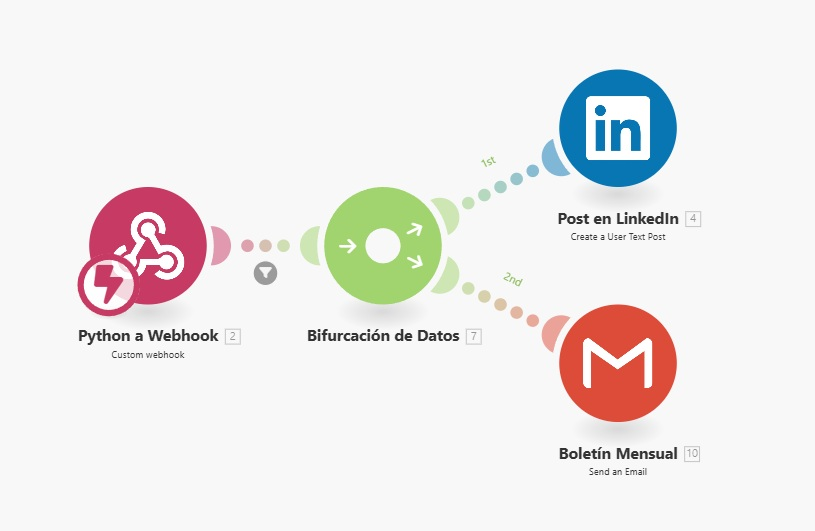

In [ ]:
# ========================================================================
# Ejecutar escenario de MAKE: publicar en LinkedIn y enviar boletín (HTML)
# Lee webhook y secreto desde archivos privados en Drive
# ========================================================================

# --- Config ---
CONFIG_DIR = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/config"
MAKE_DIR   = "/content/drive/MyDrive/Colab Notebooks/BS - DS/TFM/tfm_1_resumen_multimodal/make"

# --- Cargar credenciales desde archivos ---
with open(os.path.join(CONFIG_DIR, "webhook.txt"), "r", encoding="utf-8") as f:
    webhook_url = f.read().strip()
with open(os.path.join(CONFIG_DIR, "secret.txt"), "r", encoding="utf-8") as f:
    MAKE_SECRET = f.read().strip()

# --- Validaciones rápidas ---
assert webhook_url.startswith("https://hook."), "Webhook URL inválida o vacía"
assert len(MAKE_SECRET) > 0, "MAKE_SECRET vacío"

# --- Cargar contenidos reales (HTML + TXT fallback) ---
ruta_html = os.path.join(MAKE_DIR, "boletin_mensual.html")
ruta_txt  = os.path.join(MAKE_DIR, "boletin_mensual.txt")  # generado como fallback en el paso anterior

boletin_html = None
boletin_txt  = ""

if os.path.isfile(ruta_html):
    with open(ruta_html, "r", encoding="utf-8") as f:
        boletin_html = f.read().strip()

if os.path.isfile(ruta_txt):
    with open(ruta_txt, "r", encoding="utf-8") as f:
        boletin_txt = f.read().strip()

# LinkedIn
with open(os.path.join(MAKE_DIR, "post_linkedin.txt"), "r", encoding="utf-8") as f:
    linkedin = (f.read().strip() or "")[:1300]  # límite típico LinkedIn ~1300 chars

# (Opcional) Modo test para no publicar LinkedIn: añade un filtro en Make si lo usas
MODO_TEST = False

# --- Payload: incluimos ambos campos para que Make escoja el que necesite ---
payload = {
    "trigger": "TFM1",
    "secret": MAKE_SECRET,
    "timestamp": datetime.datetime.now().isoformat(timespec="seconds"),
    # Contenido HTML del boletín (preferente). Si es None, Make debería usar el texto.
    "boletin_html": boletin_html,
    # Fallback en texto plano (para clientes que no soporten HTML o por compatibilidad previa)
    "boletin_texto": boletin_txt,
    # Por compatibilidad con tu escenario previo: mantenemos el antiguo campo
    "boletin_contenido": boletin_txt if boletin_html is None else boletin_html,
    "linkedin_contenido": linkedin,
    "test": MODO_TEST
}

# --- Envío ---
try:
    resp = requests.post(webhook_url, json=payload, timeout=20)
    print("Código:", resp.status_code)
    if resp.status_code != 200:
        print("Respuesta Make:", resp.text[:500])
except requests.RequestException as e:
    print("Error enviando a Make:", repr(e))


Código: 200


Cuando se envía el `payload` al **webhook de Make**, el servidor responde con un **código de estado HTTP** que indica si la operación se realizó correctamente o si hubo un error.

| Código | Significado | Descripción |
|:-------|:-------------|:------------|
| **200 OK** | Éxito | El escenario de Make recibió y procesó correctamente la solicitud. |
| **202 Accepted** | Aceptado | Make aceptó la petición y la procesará de forma asíncrona (correcto). |
| **400 Bad Request** | Solicitud incorrecta | El formato del `payload` es inválido o faltan campos requeridos. |
| **401 Unauthorized** | No autorizado | El secreto (`MAKE_SECRET`) no coincide o falta en la solicitud. |
| **403 Forbidden** | Prohibido | El webhook no permite el acceso desde esta fuente. |
| **404 Not Found** | No encontrado | La URL del webhook no existe o está mal escrita. |
| **408 Request Timeout** | Tiempo agotado | El servidor tardó demasiado en responder. |
| **500 Internal Server Error** | Error interno | El escenario de Make falló durante su ejecución. |
| **503 Service Unavailable** | Servicio no disponible | Make está temporalmente inactivo o en mantenimiento. |

Despúes de ejectuar el código, si todo ha ido bien, obtenemos los siguientes resultados tanto en LinkedIn como en el Email:



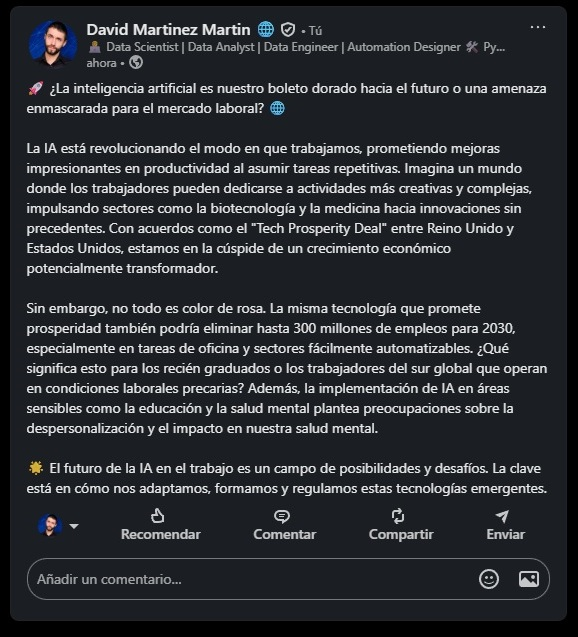

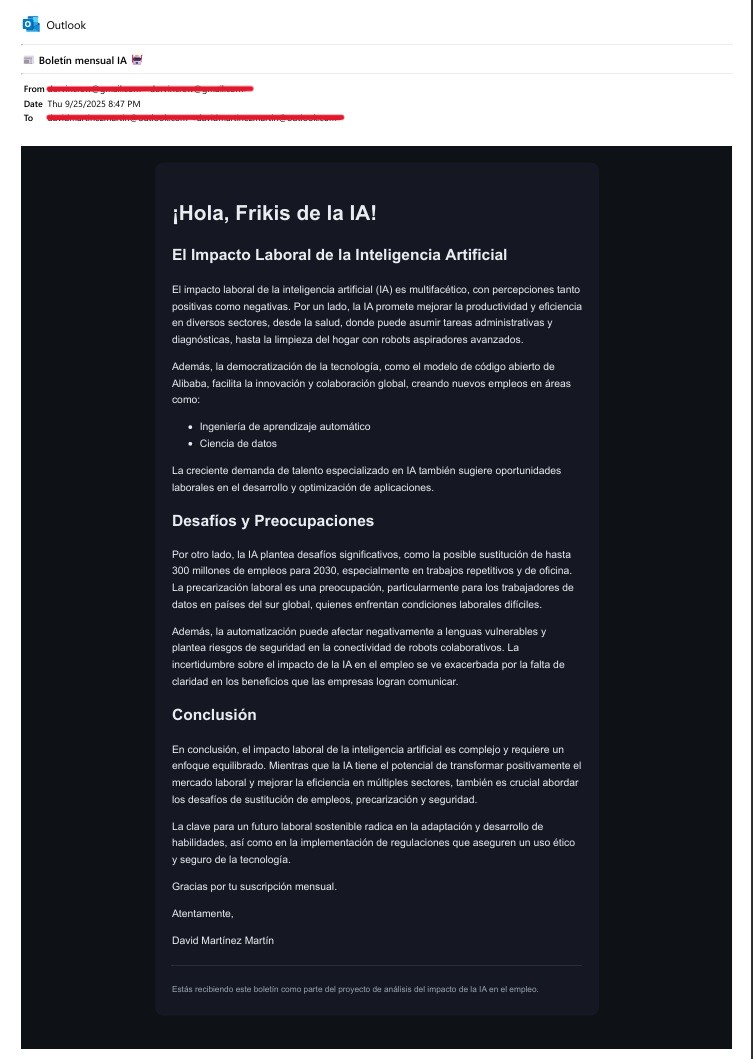

# 5. Visualizaciones

En esta sección vamos a extraer algunos gráficos que puedan acompañar los resumenes y aportar otros insights visuales más allá del texto.

## 5.1 Distribución de Sentimiento

A continuación se muestran dos gráficos de sentimiento sobre el impacto de la inteligencia artificial en el empleo, clasificadas en tres categorías:

Positivo, neutral y negativo.

Estos gráficos permite identificar de forma visual la proporción de noticias y vídeos que resaltan beneficios, efectos neutros o riesgos asociados a la IA en el ámbito laboral.

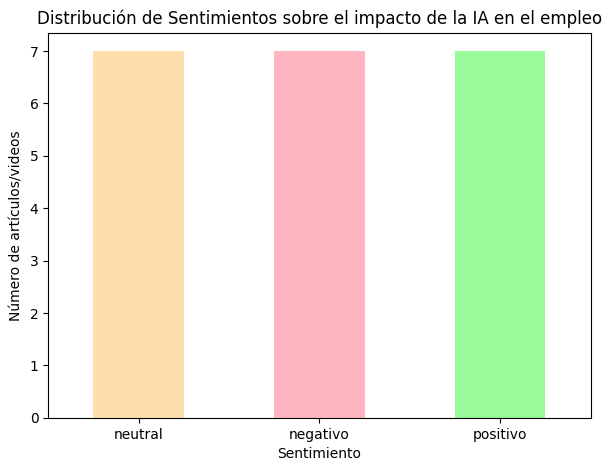

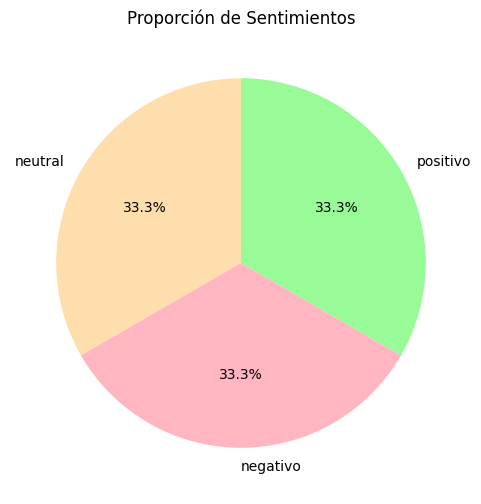

In [ ]:
# ========================================================================
# Gráfico 1: Distribución de Sentimiento desde df_head
# ========================================================================

# Definir orden y colores
orden_sentimientos = ["neutral", "negativo", "positivo"]
colores = {
    "neutral": "navajowhite",
    "negativo": "lightpink",
    "positivo": "palegreen"
}

# Contar valores y asegurar que estén todos
sentimiento_counts = df_contenido["Sentimiento"].value_counts()
sentimiento_counts = sentimiento_counts.reindex(orden_sentimientos, fill_value=0)

# --- Gráfico de barras ---
plt.figure(figsize=(7,5))
sentimiento_counts.plot(
    kind="bar",
    color=[colores[s] for s in sentimiento_counts.index]
)
plt.title("Distribución de Sentimientos sobre el impacto de la IA en el empleo")
plt.xlabel("Sentimiento")
plt.ylabel("Número de artículos/videos")
plt.xticks(rotation=0)
plt.show()

# --- Gráfico circular ---
total = sentimiento_counts.sum()
if total > 0:
    plt.figure(figsize=(6,6))
    sentimiento_counts.plot(
        kind="pie",
        autopct="%1.1f%%",
        startangle=90,
        colors=[colores[s] for s in sentimiento_counts.index]
    )
    plt.title("Proporción de Sentimientos")
    plt.ylabel("")  # quitar etiqueta automática
    plt.show()
else:
    # Mensaje si no hay datos
    fig, ax = plt.subplots(figsize=(6,6))
    ax.axis("off")
    ax.text(0.5, 0.5, "Sin datos de sentimiento para graficar",
            ha="center", va="center", fontsize=12)
    plt.show()


## 5.2 Top 3 Entidades por Categoría

El siguiente gráfico muestra las tres entidades más mencionadas en cada categoría (profesiones, sectores, empresas, países y tecnologías de IA).  
Este enfoque permite identificar rápidamente cuáles son los actores y áreas más destacados en la discusión pública sobre el impacto de la inteligencia artificial en el empleo, evitando la saturación de información al limitarse a los elementos más frecuentes.


In [ ]:
df_contenido.head()

,fuente,titulo,url,texto,Entidades_GPT,Oraciones_clave,Sentimiento,Resumen_individual
0,xataka,Microsoft jamás ha sido tan valiosa en toda su...,https://www.xataka.com/empresas-y-economia/mic...,"El primer ordenador de Satya Nadella, CEO de M...","{'Sectores laborales': ['tecnología', 'informá...",[La principal amenaza externa para Microsoft n...,negativo,El impacto laboral de la inteligencia artifici...
1,xataka,Una nueva generación de robots promete precisi...,https://www.xataka.com/robotica-e-ia/nueva-gen...,El movimiento del brazo robótico parece impeca...,"{'Sectores laborales': ['salud', 'manufactura'...",[El interés por los robots colaborativos se ha...,neutral,La inteligencia artificial y los robots colabo...
2,xataka,"Hay muchas carreras ""internas"" dentro de la gr...",https://www.xataka.com/robotica-e-ia/alibaba-s...,El gigante chino Alibaba ha lanzado oficialmen...,"{'Sectores laborales': [], 'Profesiones': [], ...","[Alibaba ha lanzado Qwen3-Omni, un modelo de i...",positivo,"Alibaba ha lanzado Qwen3-Omni, un modelo de in..."
3,xataka,EEUU tiene un mensaje para los que le dieron l...,https://www.xataka.com/magnet/eeuu-ha-enviado-...,No es ningún secreto que el verano del F-35 de...,"{'Sectores laborales': [], 'Profesiones': [], ...",[La incorporación de capacidades avanzadas de ...,neutral,La incorporación de inteligencia artificial en...
4,xataka,"""Hay que recordarle a la gente que ellos traba...",https://www.xataka.com/empresas-y-economia/hay...,A estas alturas ya nadie duda que la adopción ...,"{'Sectores laborales': ['inmobiliaria', 'biene...",[La adopción del teletrabajo durante la pandem...,negativo,La adopción del teletrabajo y el empoderamient...


In [ ]:
def extraer_lista_entidades(df, categoria, col="Entidades_GPT"):
    """
    Devuelve una lista plana con todas las entidades de la categoría indicada
    leyendo la columna 'Entidades_GPT' (dict, JSON o string con comillas simples).
    """
    salida = []
    for v in df[col]:
        if pd.isna(v):
            continue

        # Normaliza a dict
        d = v if isinstance(v, dict) else None
        if d is None and isinstance(v, str):
            # 1) Soporta comillas simples con literal_eval
            try:
                d = ast.literal_eval(v)
            except Exception:
                d = None
            # 2) Si falla, intenta JSON estándar
            if d is None:
                try:
                    d = json.loads(v)
                except Exception:
                    d = {}

        if not isinstance(d, dict):
            continue

        items = d.get(categoria, [])
        # Normaliza a lista de strings
        if isinstance(items, list):
            salida.extend([str(x).strip() for x in items if str(x).strip()])
        elif isinstance(items, str):
            salida.extend([s.strip() for s in items.split(",") if s.strip()])

    return salida

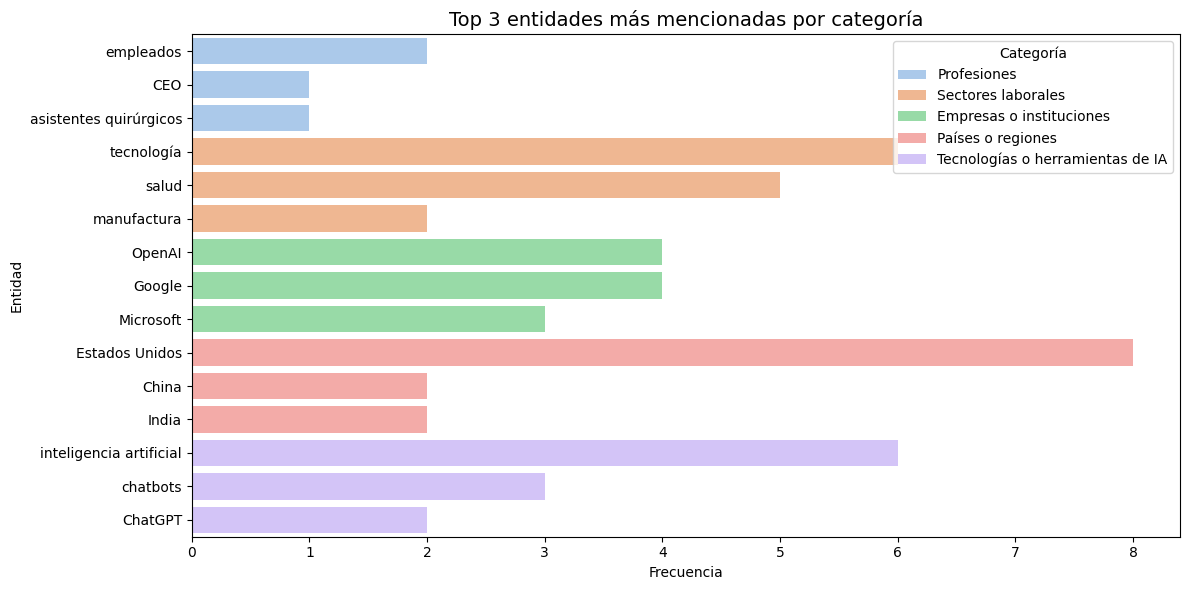

In [ ]:
# =========================================================
# Preparamos los datos de las entidades
# =========================================================
categorias = ["Profesiones", "Sectores laborales", "Empresas o instituciones", "Países o regiones", "Tecnologías o herramientas de IA"]

conteos_top3 = []
for cat in categorias:
    lista = extraer_lista_entidades(df_contenido, cat)
    conteos = Counter(lista).most_common(3)  # Solo el top 3
    for entidad, valor in conteos:
        conteos_top3.append({"Categoría": cat, "Entidad": entidad, "Frecuencia": valor})

df_entidades_top3 = pd.DataFrame(conteos_top3)

# =========================================================
# Visualización
# =========================================================
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_entidades_top3,
    x="Frecuencia",
    y="Entidad",
    hue="Categoría",
    dodge=False,
    palette="pastel"
)

plt.title("Top 3 entidades más mencionadas por categoría", fontsize=14)
plt.xlabel("Frecuencia")
plt.ylabel("Entidad")
plt.legend(title="Categoría")
plt.tight_layout()
plt.show()

# 6. Conclusiones

A lo largo del proyecto se ha conseguido integrar y armonizar fuentes muy distintas, como artículos web y vídeos transcritos, dentro de un mismo flujo de análisis. El proceso ha permitido comprobar cómo la combinación de **web scraping**, **transcripción automática** y **modelos de lenguaje** puede transformar un conjunto disperso de información en un dataset estructurado y listo para trabajar. En el camino se destaca la importancia de mantener desde el inicio una estructura estandarizada de columnas para evitar incompatibilidades, y también la posibilidad de construir un sistema completo. Desde la recolección de datos hasta la visualización, generando así resultados con un valor real y aplicable en escenarios como **marketing**, **comunicación** o **creación de contenido**.

Uno de los hallazgos más claros es que los **LLMs** como **ChatGPT** facilitan enormemente tareas que habrían sido muy costosas si no contaramos con tal tecnología. La extracción de entidades, la clasificación de sentimientos o la generación de resúmenes han sido un claro ejemplo de ello. El pipeline desarrollado no solo resuelve un problema concreto, sino que además es adaptable y podría repetirse de manera semanal o mensual para generar análisis periódicos.

No obstante, también aparecieron limitaciones. La dependencia de herramientas externas como **Whisper**, **ChatGPT** o **MAKE** introduce riesgos técnicos y sesgos, y el coste de las llamadas a la **API**, aunque asumible en este caso (0.04 centimos por resumen), puede aumentar según el modelo utilizado y la escala de complejidad del sistema. Además, algunas salidas requieren validación manual, especialmente en lo relativo a entidades nombradas y sentimientos. En el futuro, el proyecto podría enriquecerse incluyendo más fuentes como podcasts o redes sociales, aumentar las visualizaciones añadirlas a la automatización para que se publiquen junto al texto generado.

Para llegar a este resultado se combinaron diferentes técnicas: **scraping** para artículos, **extracción de metadatos** con **yt_dlp** y **transcripción** mediante **Whisper** para vídeos, y **modelos de lenguaje** para todas las tareas de **procesamiento del texto**. Cada uno aportó sus ventajas: el **scraping** fue rápido y estandarizado, aunque dependiente de la estructura **HTML**; **Whisper** permitió transformar audio en texto, aunque con errores puntuales en nombres propios; y **ChatGPT** resultó flexible y potente, aunque con riesgos de sesgo y coste por token.

El procesamiento de datos incluyó la normalización de columnas, la limpieza de ruido textual y la estandarización de formatos, además de la creación de copias de seguridad para asegurar la trazabilidad del trabajo. Sobre esta base, los **LLMs** permitieron condensar grandes volúmenes de información en resúmenes sintéticos y comprensibles. Para conseguir resultados más claros y consistentes se probaron diferentes **prompts** y formatos de salida, desde texto libre hasta **JSON** estandarizado, siendo esta última opción especialmente útil para integrarse con los DataFrames.

Finalmente, las visualizaciones aportaron un valor añadido al análisis:
Los gráficos de sentimientos facilitaron una visión inmediata de la polaridad de las fuentes, mientras que el análisis de entidades, permitió identificar los protagonistas y sectores clave sin necesidad de revisar todos los textos.

En conjunto, el trabajo demuestra que un pipeline que combina **scraping**, **transcripción**, **NLP con modelos de lenguaje** y **visualización** puede transformar datos no estructurados en informes claros, adaptables y repetibles. Más allá del ejercicio técnico, lo importante es que estas herramientas permiten construir soluciones reales que ayudan a entender fenómenos complejos como el impacto de la inteligencia artificial en el empleo.

#7. Anexos

En el desarrollo del TFM de **Resumen Multimodal sobre el Impacto de la IA en el Empleo**, se han empleado diversas librerías y servicios para cubrir las fases de búsqueda, extracción, transcripción, análisis y automatización de la difusión de resultados. A continuación, se documentan todas las herramientas utilizadas, junto con referencias a su documentación oficial.

---

1. Scraping de artículos web
- **googlesearch-python**: búsquedas en Google desde Python.  
  [Documentación](https://pypi.org/project/googlesearch-python/)  
- **newspaper3k**: descarga y análisis de artículos web.  
  [Documentación](https://newspaper.readthedocs.io/en/latest/)  
- **requests**: librería estándar para realizar peticiones HTTP.  
  [Documentación](https://requests.readthedocs.io/en/latest/)  
- **BeautifulSoup (bs4)**: parseo y análisis de HTML.  
  [Documentación](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)  
- **feedparser**: lectura y análisis de feeds RSS.  
  [Documentación](https://pythonhosted.org/feedparser/)  

---

2. Gestión de archivos y utilidades
- **os**: gestión de archivos y directorios.  
  [Documentación](https://docs.python.org/3/library/os.html)  
- **re**: expresiones regulares para búsqueda de patrones en texto.  
  [Documentación](https://docs.python.org/3/library/re.html)  
- **datetime**: manejo de fechas y horas.  
  [Documentación](https://docs.python.org/3/library/datetime.html)  
- **time**: utilidades de temporización y pausas en ejecución.  
  [Documentación](https://docs.python.org/3/library/time.html)  
- **json**: lectura y escritura de datos en formato JSON.  
  [Documentación](https://docs.python.org/3/library/json.html)  
- **unicodedata**: normalización y tratamiento de caracteres Unicode.  
  [Documentación](https://docs.python.org/3/library/unicodedata.html)  

---

3. Descarga y transcripción de vídeo/audio
- **yt-dlp**: descarga de vídeos y audios de YouTube y otras plataformas.  
  [Repositorio oficial](https://github.com/yt-dlp/yt-dlp)  
- **whisper (OpenAI Whisper)**: transcripción automática de audio a texto.  
  [Repositorio oficial](https://github.com/openai/whisper)  

---

4. Visualización de datos
- **matplotlib**: librería base para visualización de gráficos en 2D.  
  [Documentación](https://matplotlib.org/stable/contents.html)  
- **seaborn**: visualización estadística basada en matplotlib.  
  [Documentación](https://seaborn.pydata.org/)  
- **plotly**: gráficos interactivos y dashboards.  
  [Documentación](https://plotly.com/python/)  

---

5. Modelos de Lenguaje y API de OpenAI
- **openai**: librería oficial para interactuar con los modelos de OpenAI.  
  [Documentación](https://platform.openai.com/docs/)  
- **python-dotenv**: gestión de variables de entorno para ocultar claves API.  
  [Documentación](https://pypi.org/project/python-dotenv/)  

---

6. Automatización con MAKE
- **Webhook (Make.com)**: integración para automatizar la publicación en LinkedIn y el envío del boletín o newsletter.  
  [Sitio oficial](https://www.make.com/)  

---

7. Librerías adicionales de soporte
- **pandas**: manipulación y análisis de datos.  
  [Documentación](https://pandas.pydata.org/docs/)  
- **numpy**: cálculo numérico y estructuras de arrays.  
  [Documentación](https://numpy.org/doc/)  
- **torch (PyTorch)**: librería para computación numérica y modelos de deep learning.  
  [Documentación](https://pytorch.org/docs/stable/index.html)  
- **tqdm**: barras de progreso para bucles y procesos.  
  [Documentación](https://tqdm.github.io/)  
- **typing**: anotaciones de tipo para funciones y clases.  
  [Documentación](https://docs.python.org/3/library/typing.html)  
- **collections.Counter**: contador de elementos dentro de colecciones.  
  [Documentación](https://docs.python.org/3/library/collections.html#collections.Counter)  

---

8. Integración con Google Colab
- **google.colab.drive**: integración para montar Google Drive y acceder a archivos de configuración y almacenamiento.  
  [Referencia](https://colab.research.google.com/notebooks/io.ipynb)  

---

9. Proyecto en GitHub
- **GitHub**: Enlace al repositorio del proyecto.

  [Repositorio](https://github.com/davidmartimar/tfm-1-resumen-multimodal)  